In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
from scipy import stats
pd.set_option('precision', 15)

In [208]:
solitary = pd.read_csv('I:\\Data_Incubator\\icij-solitary-voices-final-dataset-for-publication.csv')

In [195]:
days_by_state_country = []
for state in solitary['state'].unique():
    days_by_country = []
    for country in solitary['citizenship_id'].unique():
        if solitary[(solitary['citizenship_id'] == country) & (solitary['state'] == state)].dropna()['days_solitary'].count() > 0:
            days_by_country.append([state,country,solitary[(solitary['citizenship_id'] == country) & (solitary['state'] == state)].dropna()['days_solitary'].sum(axis = 0)/solitary[(solitary['citizenship_id'] == country) & (solitary['state'] == state)].dropna()['days_solitary'].count()])
    days_by_country.sort(key=lambda x:x[1], reverse=False)
    days_by_state_country.append(np.asarray(days_by_country))

C:\Users\shawn\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


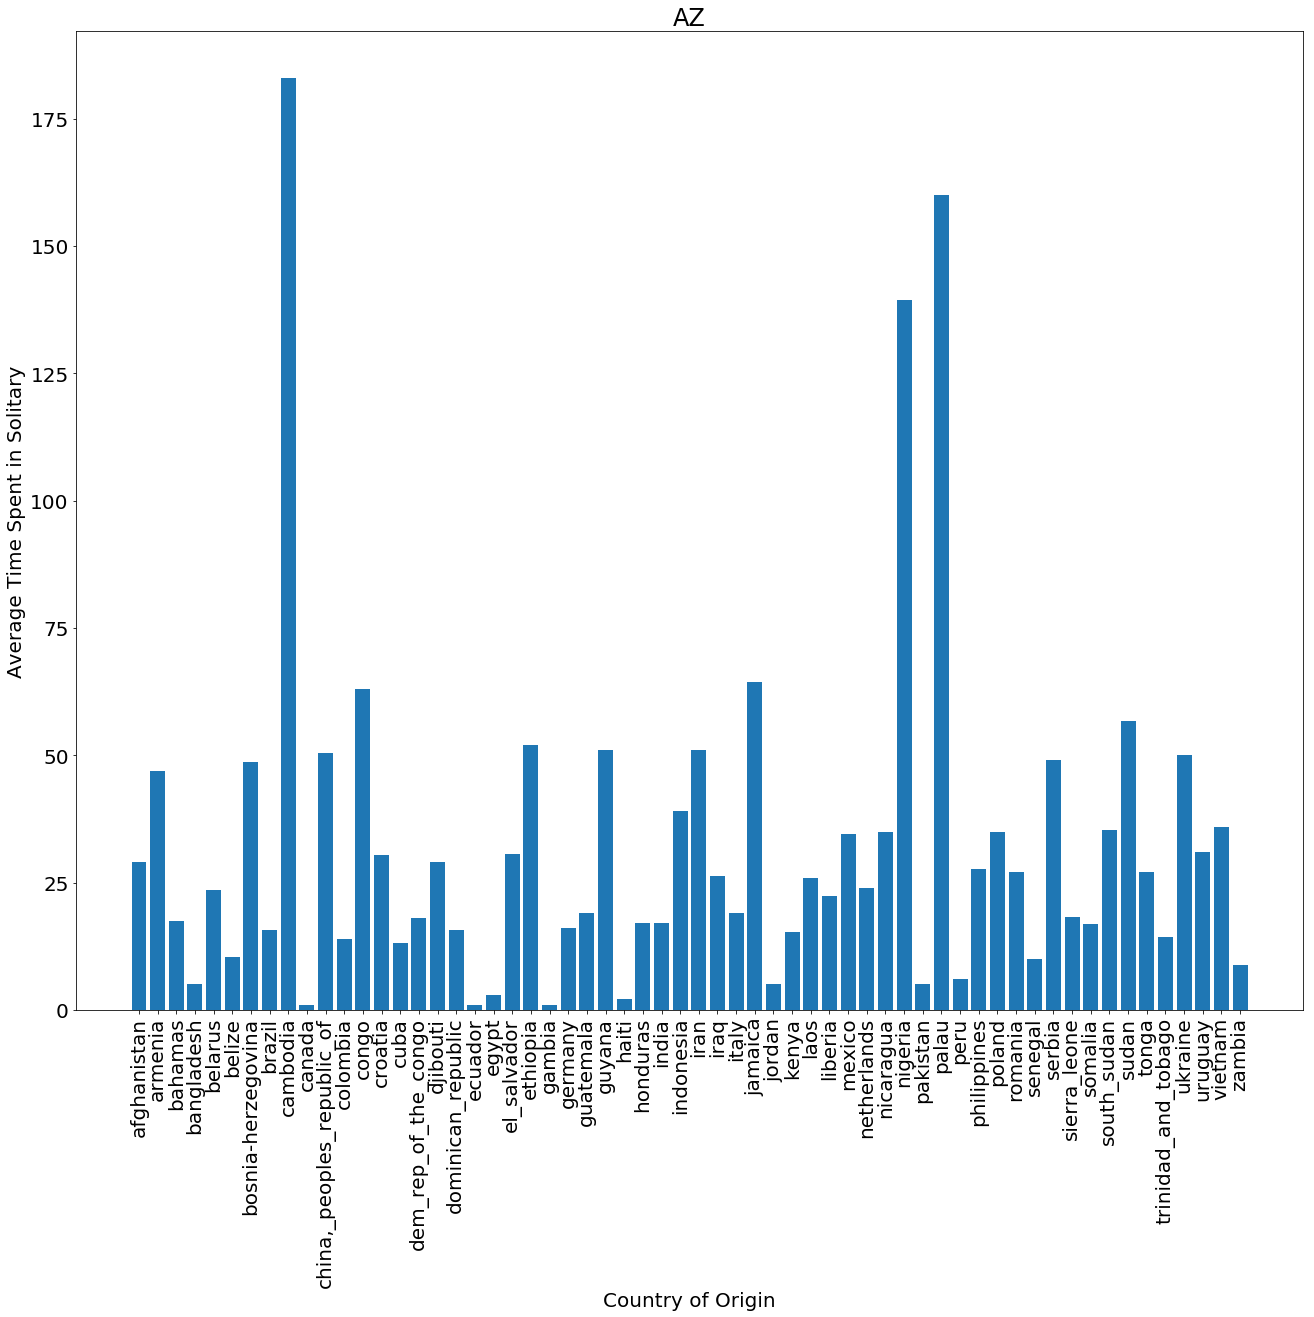

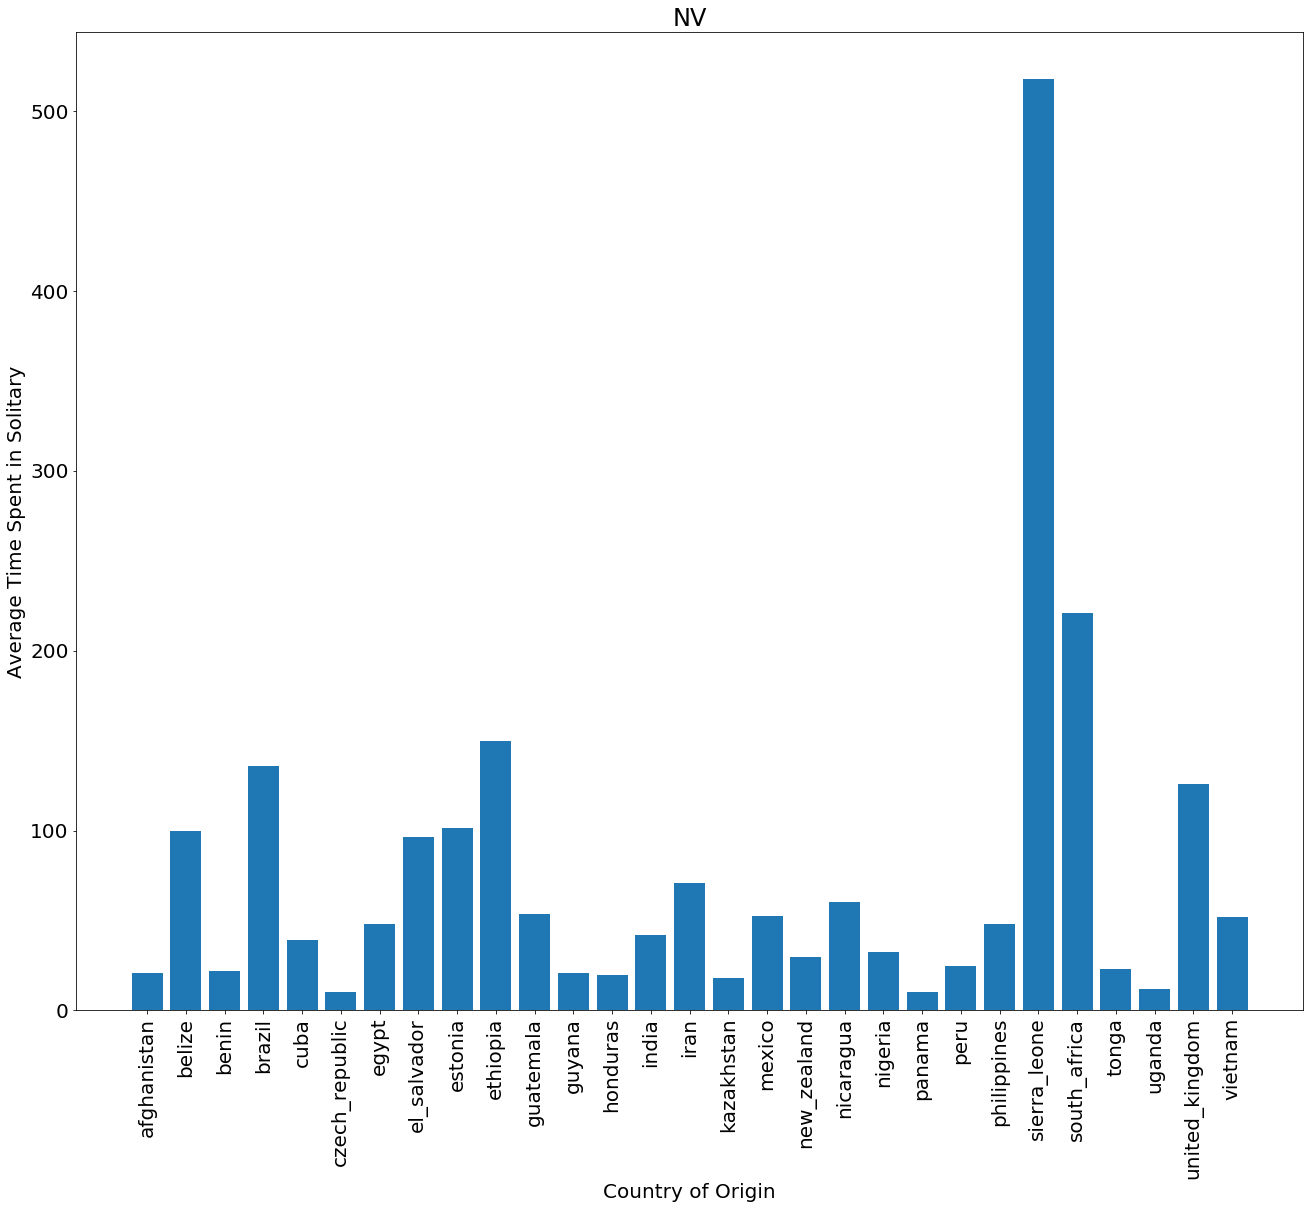

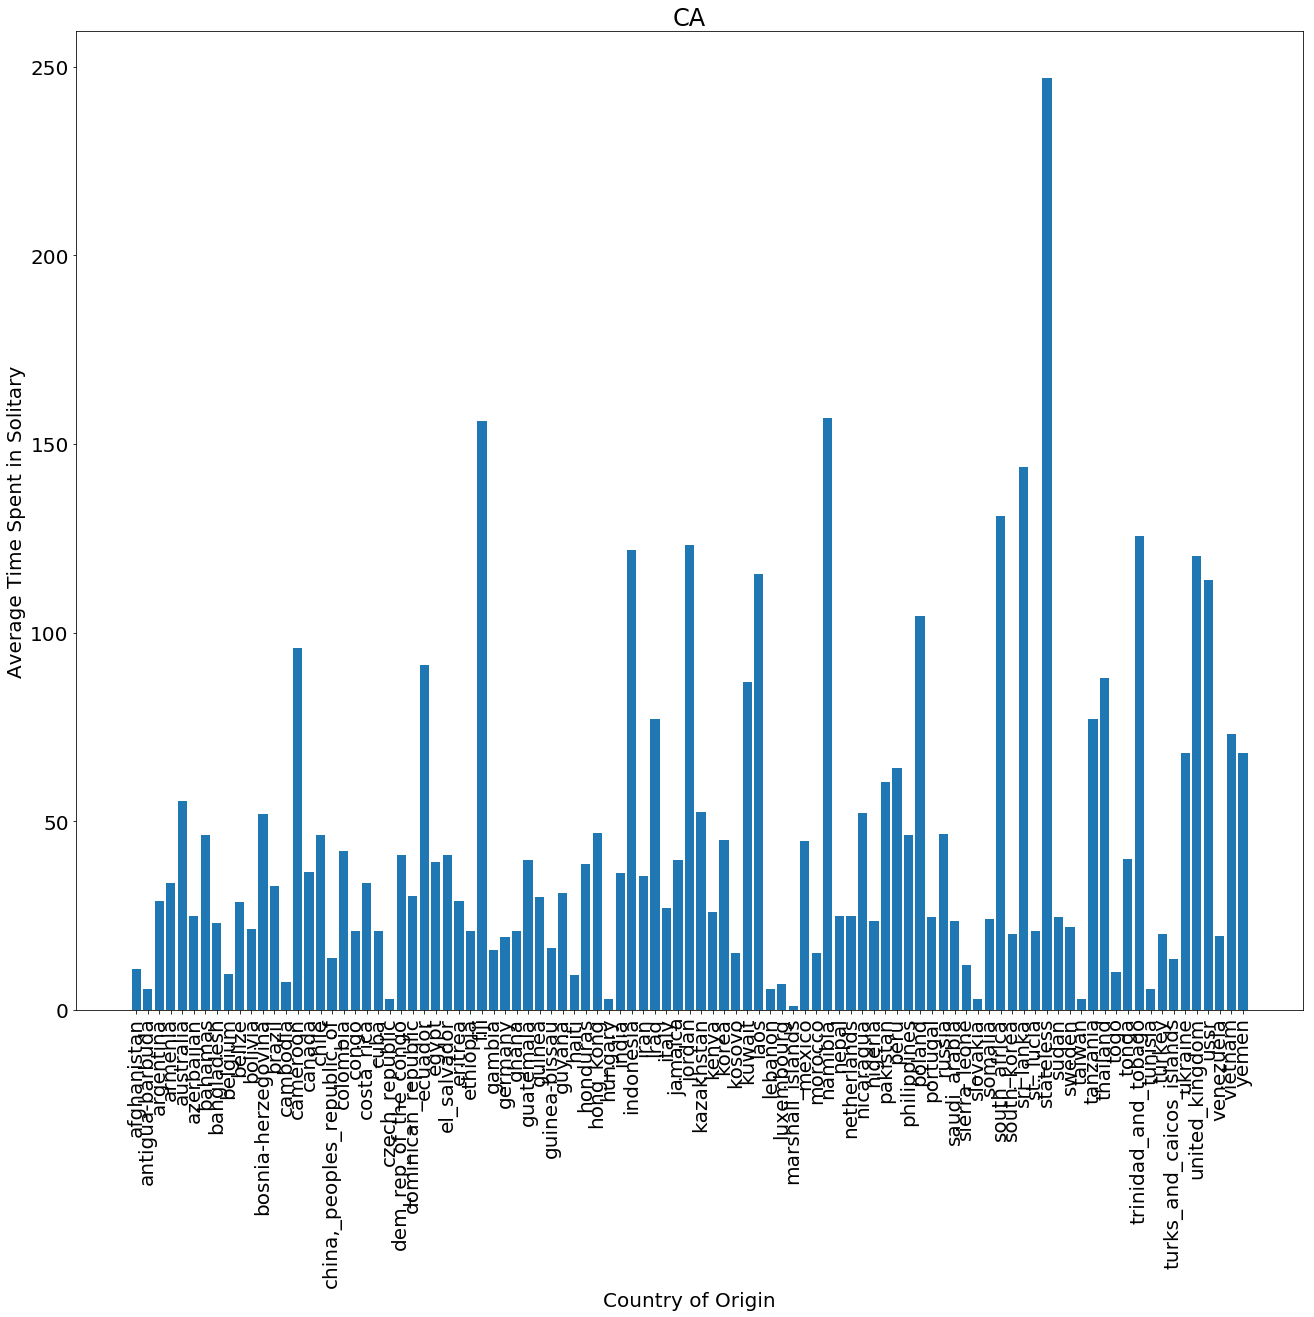

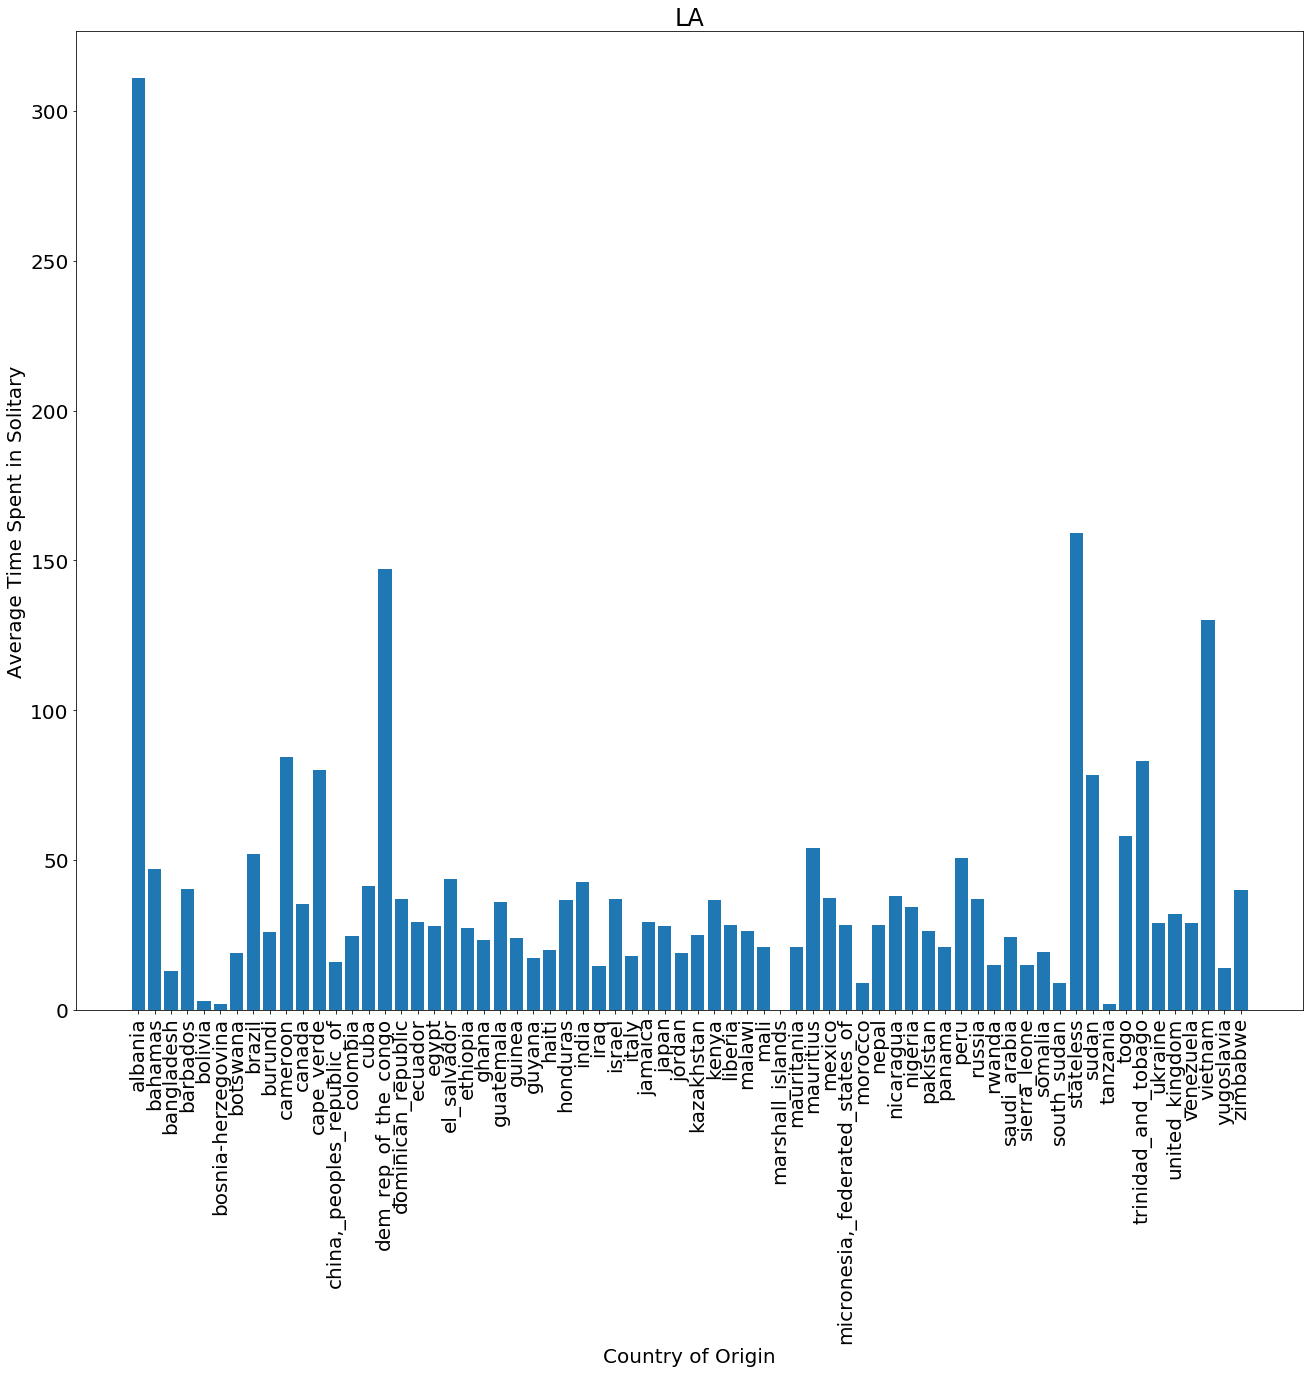

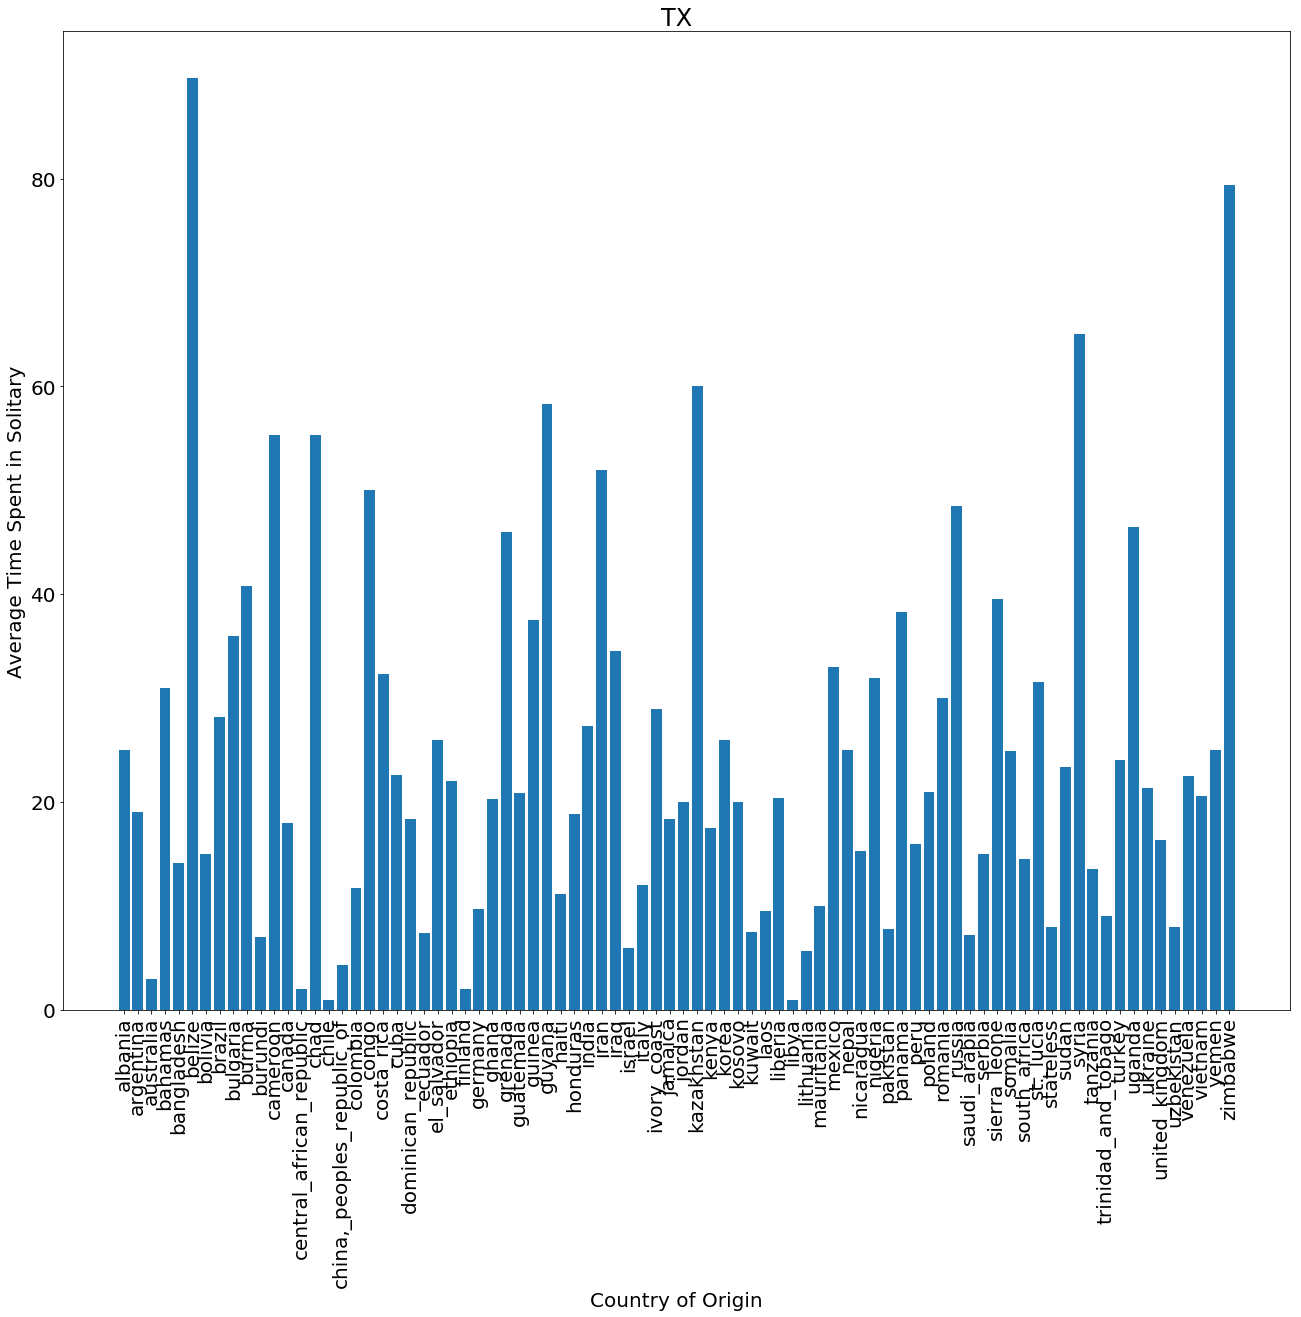

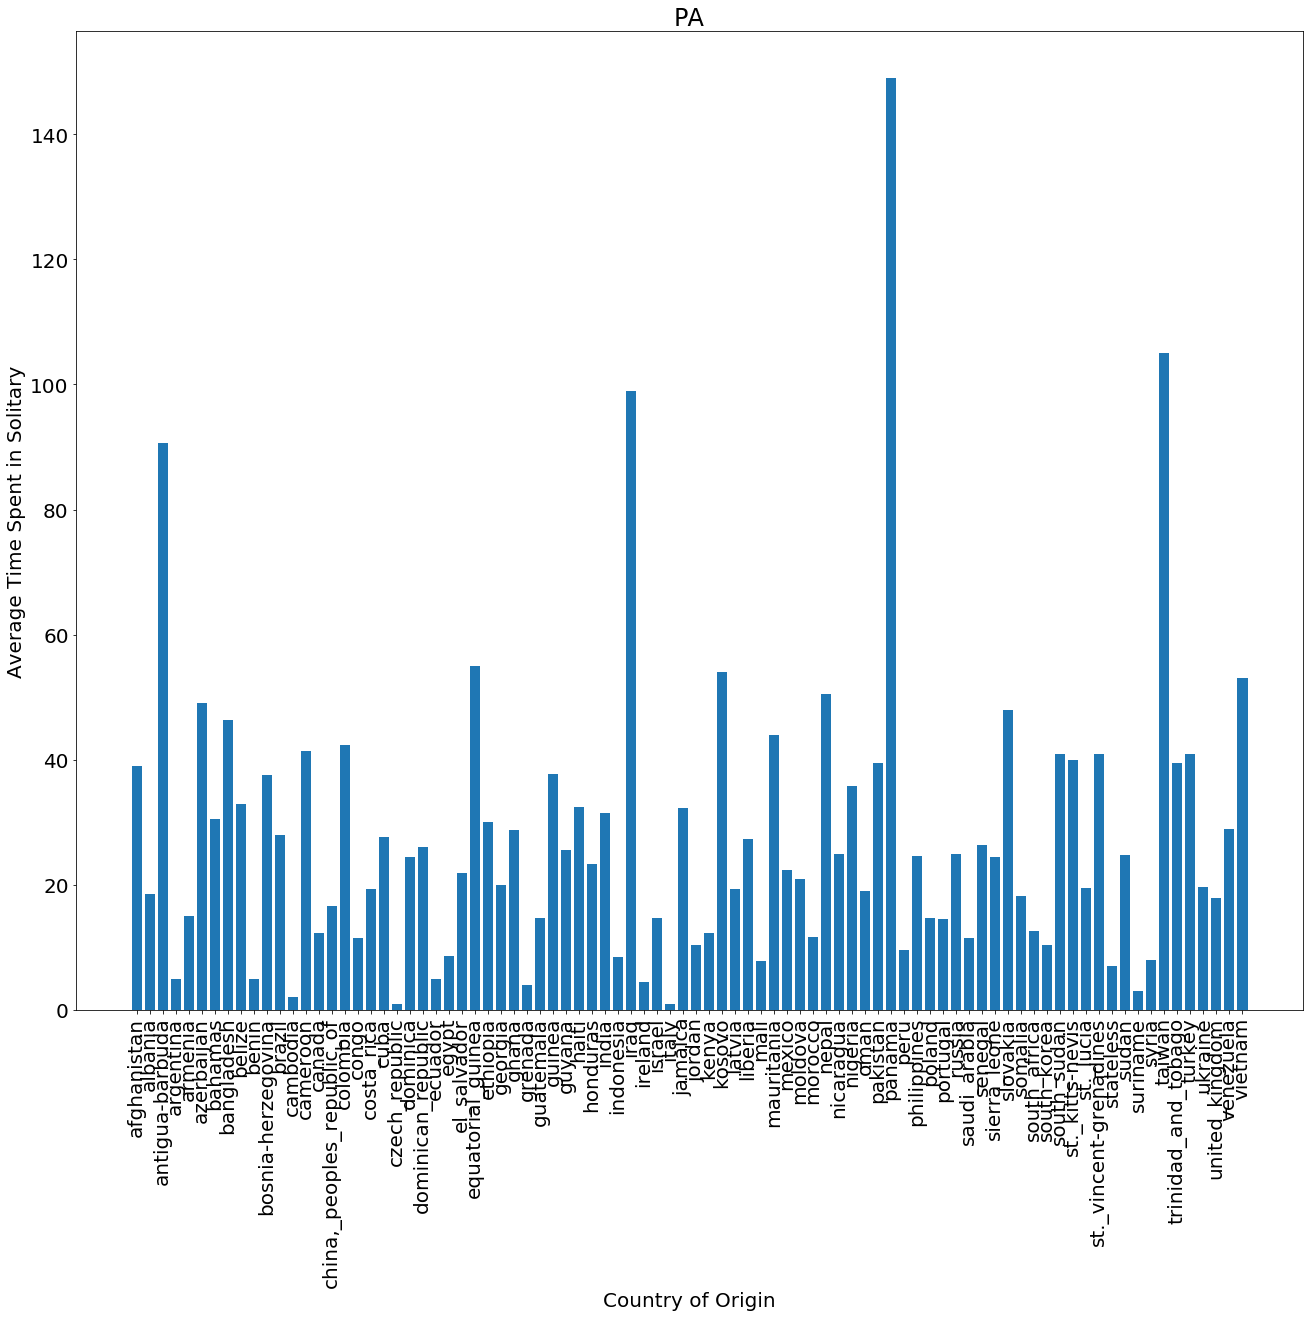

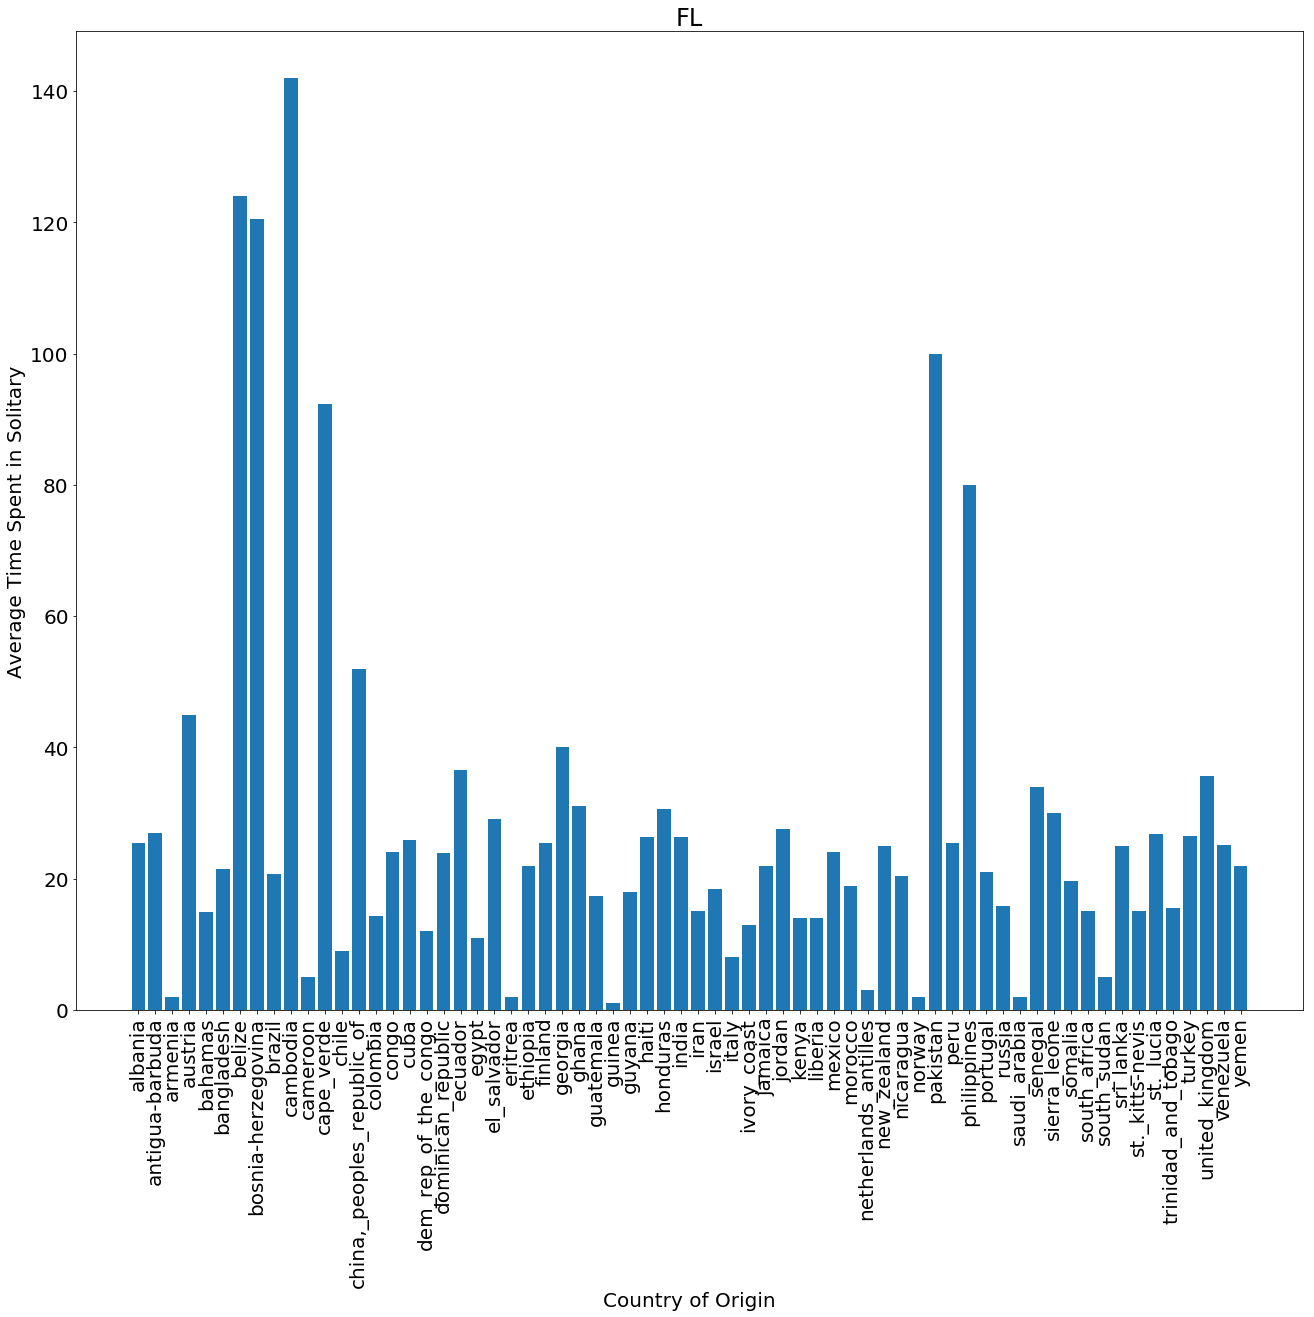

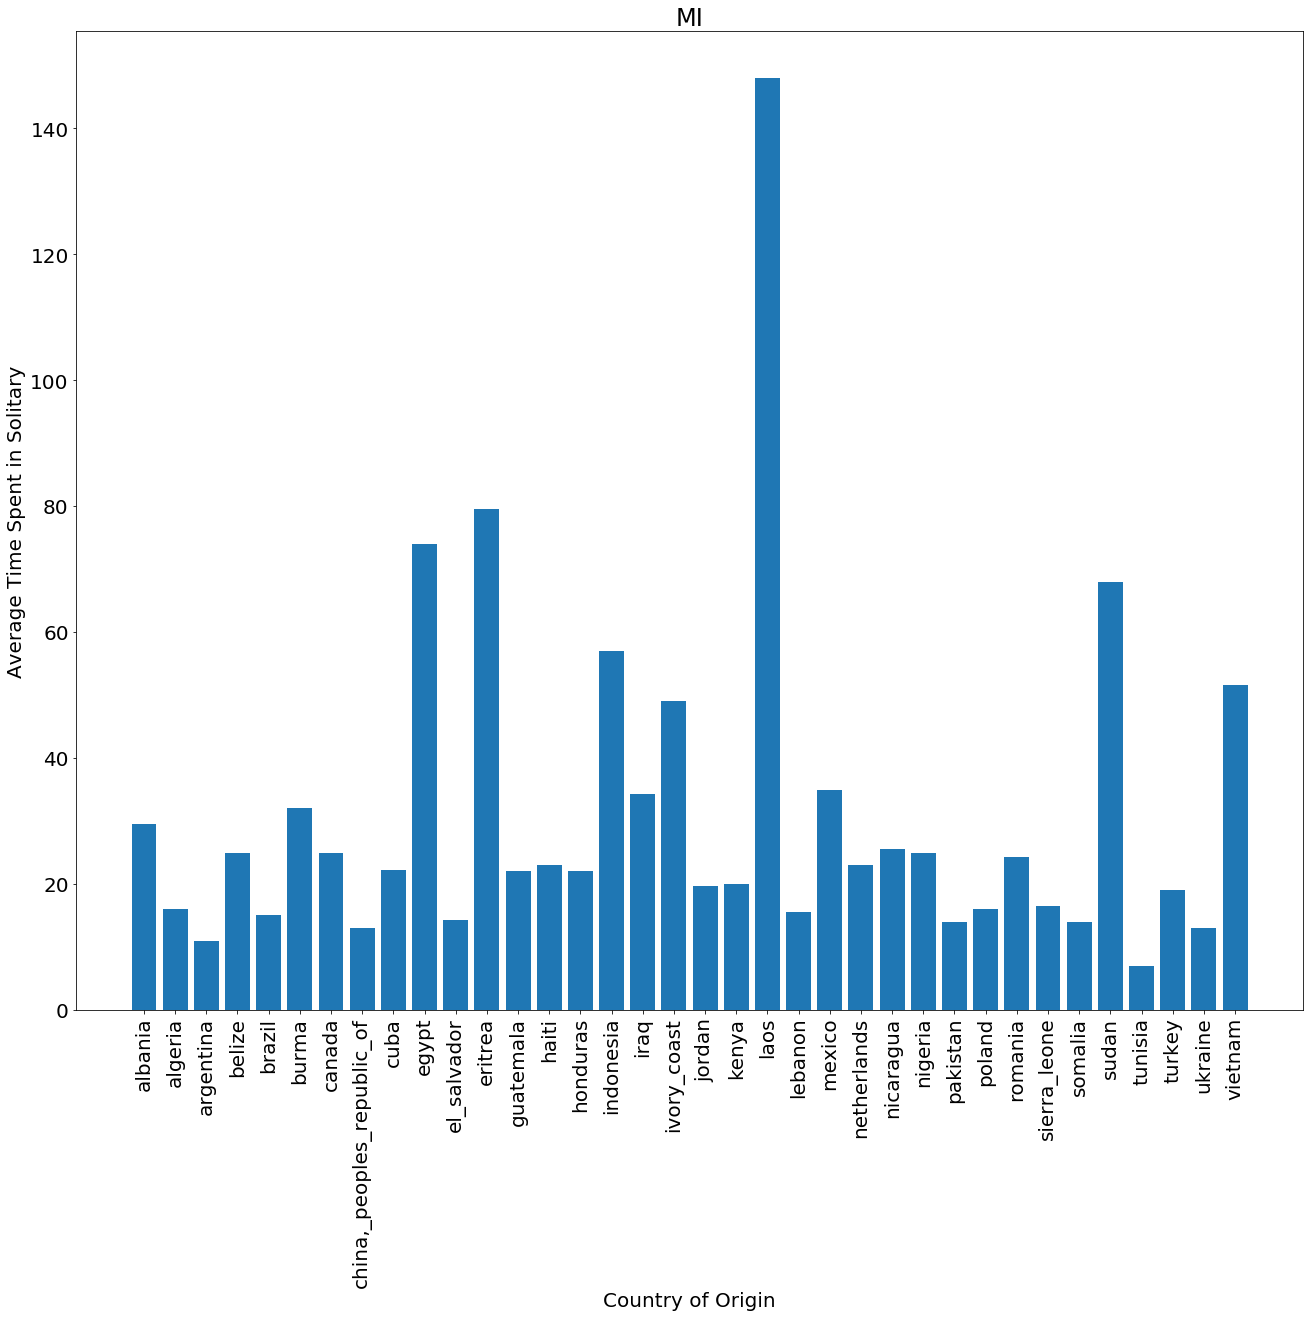

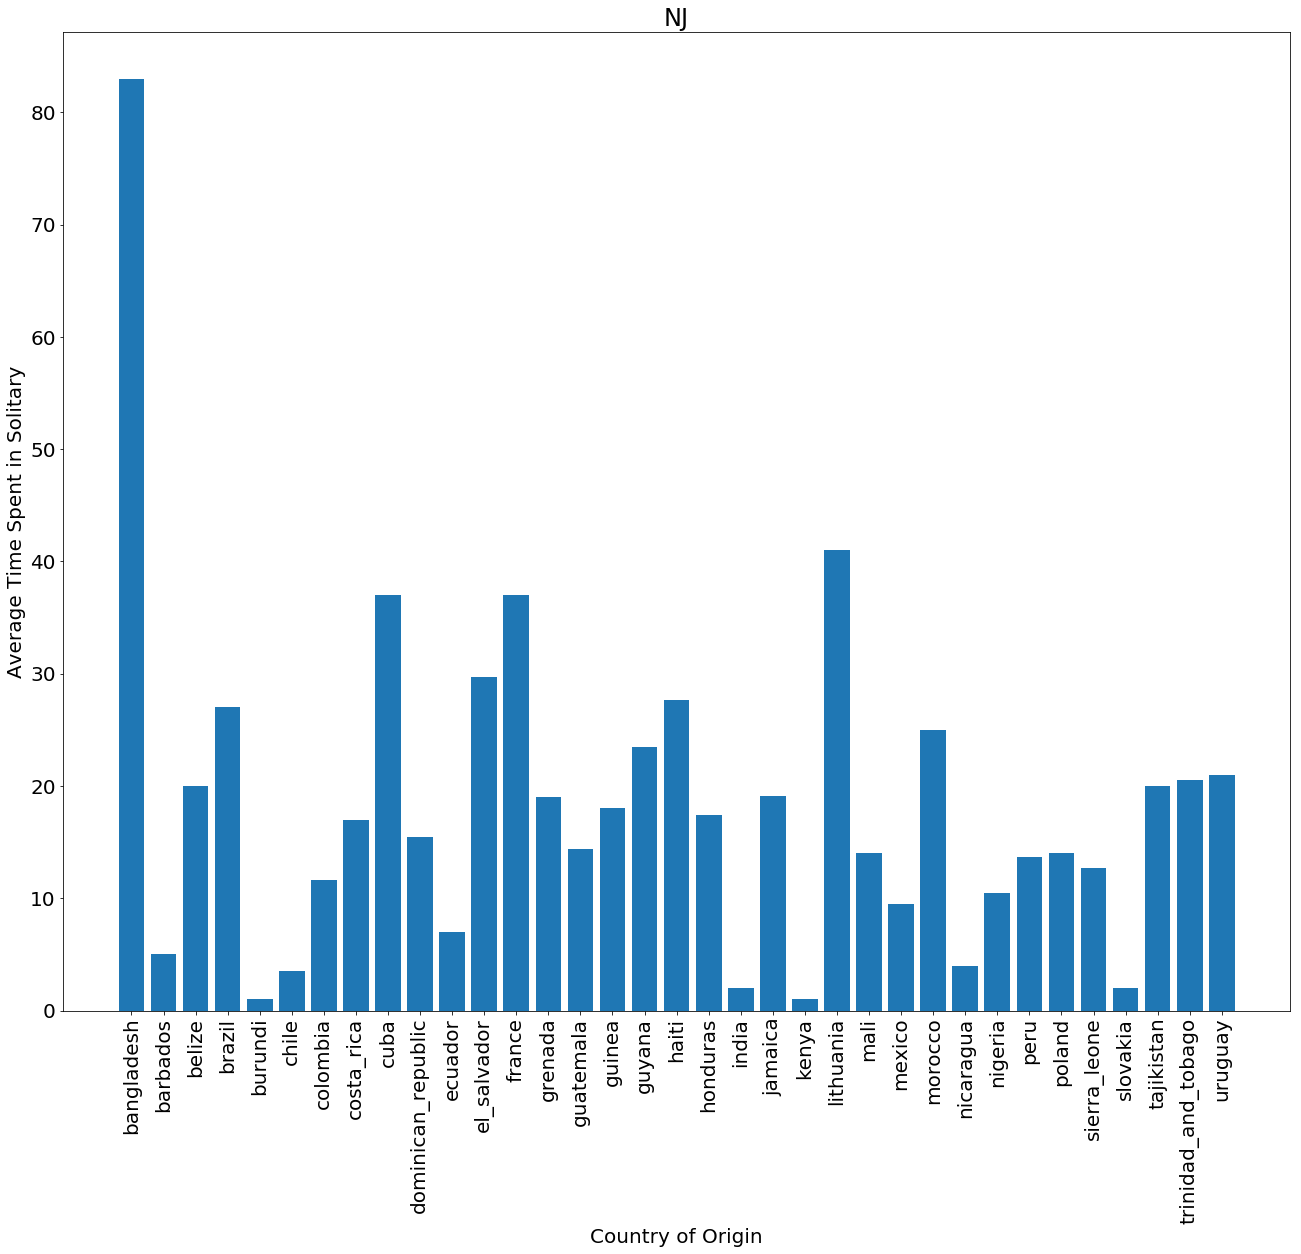

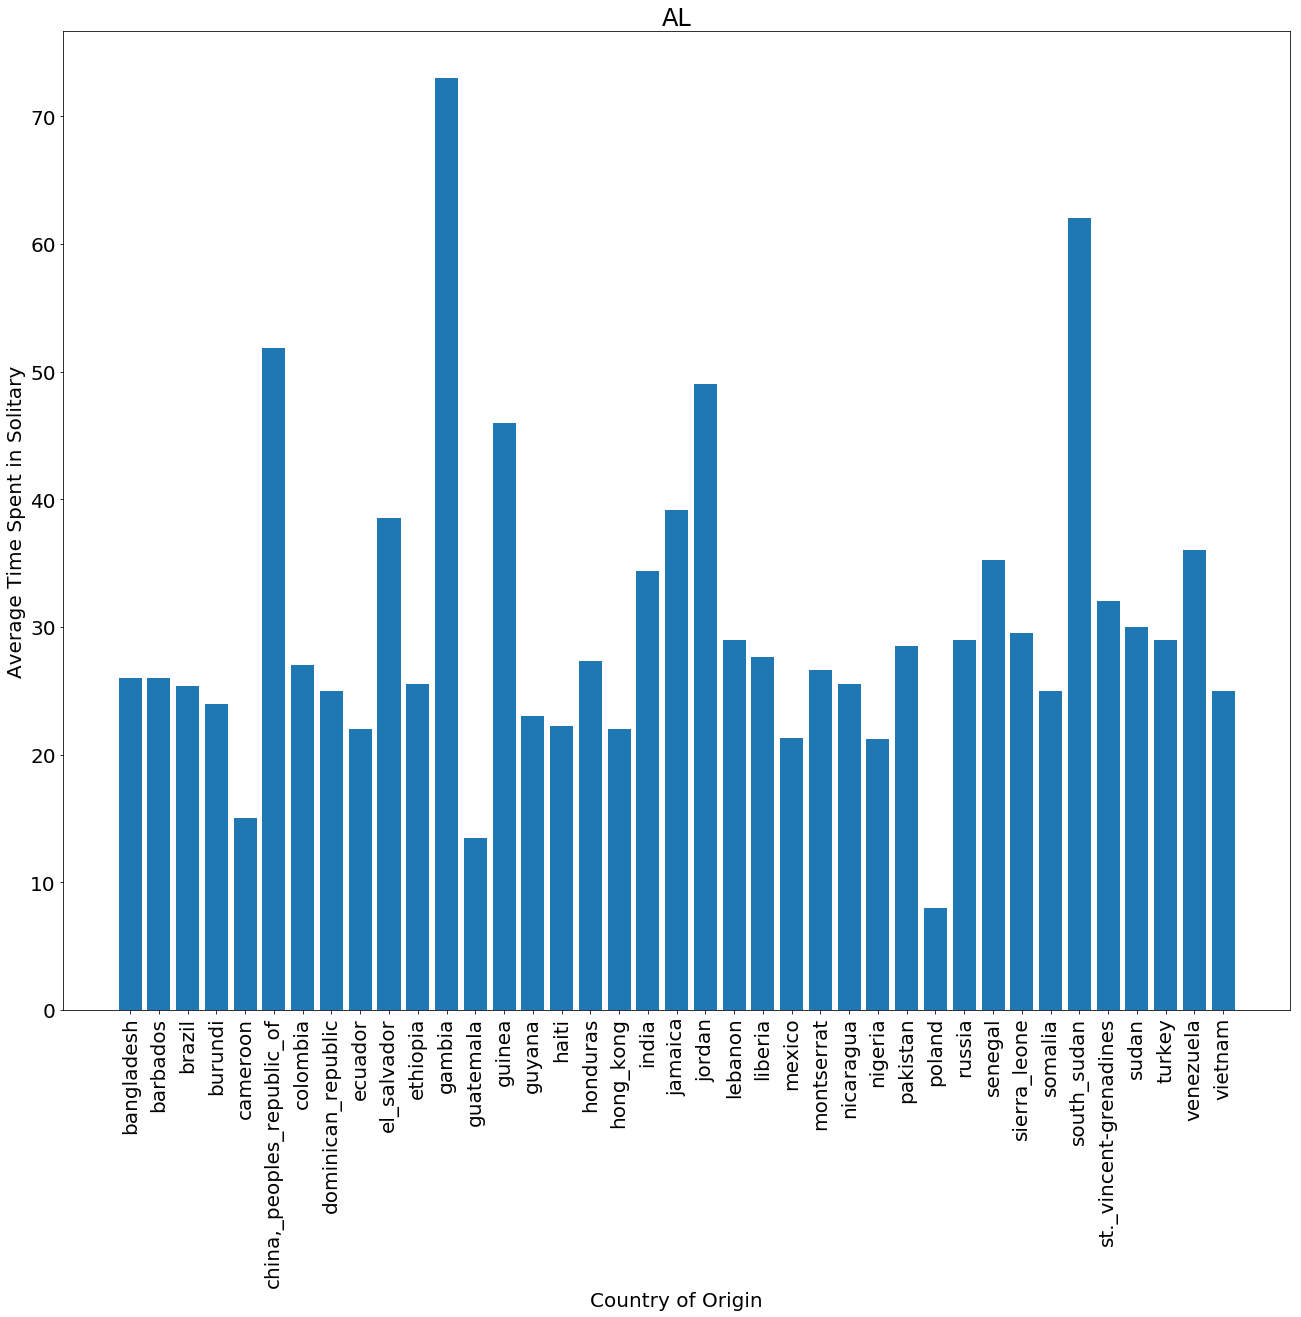

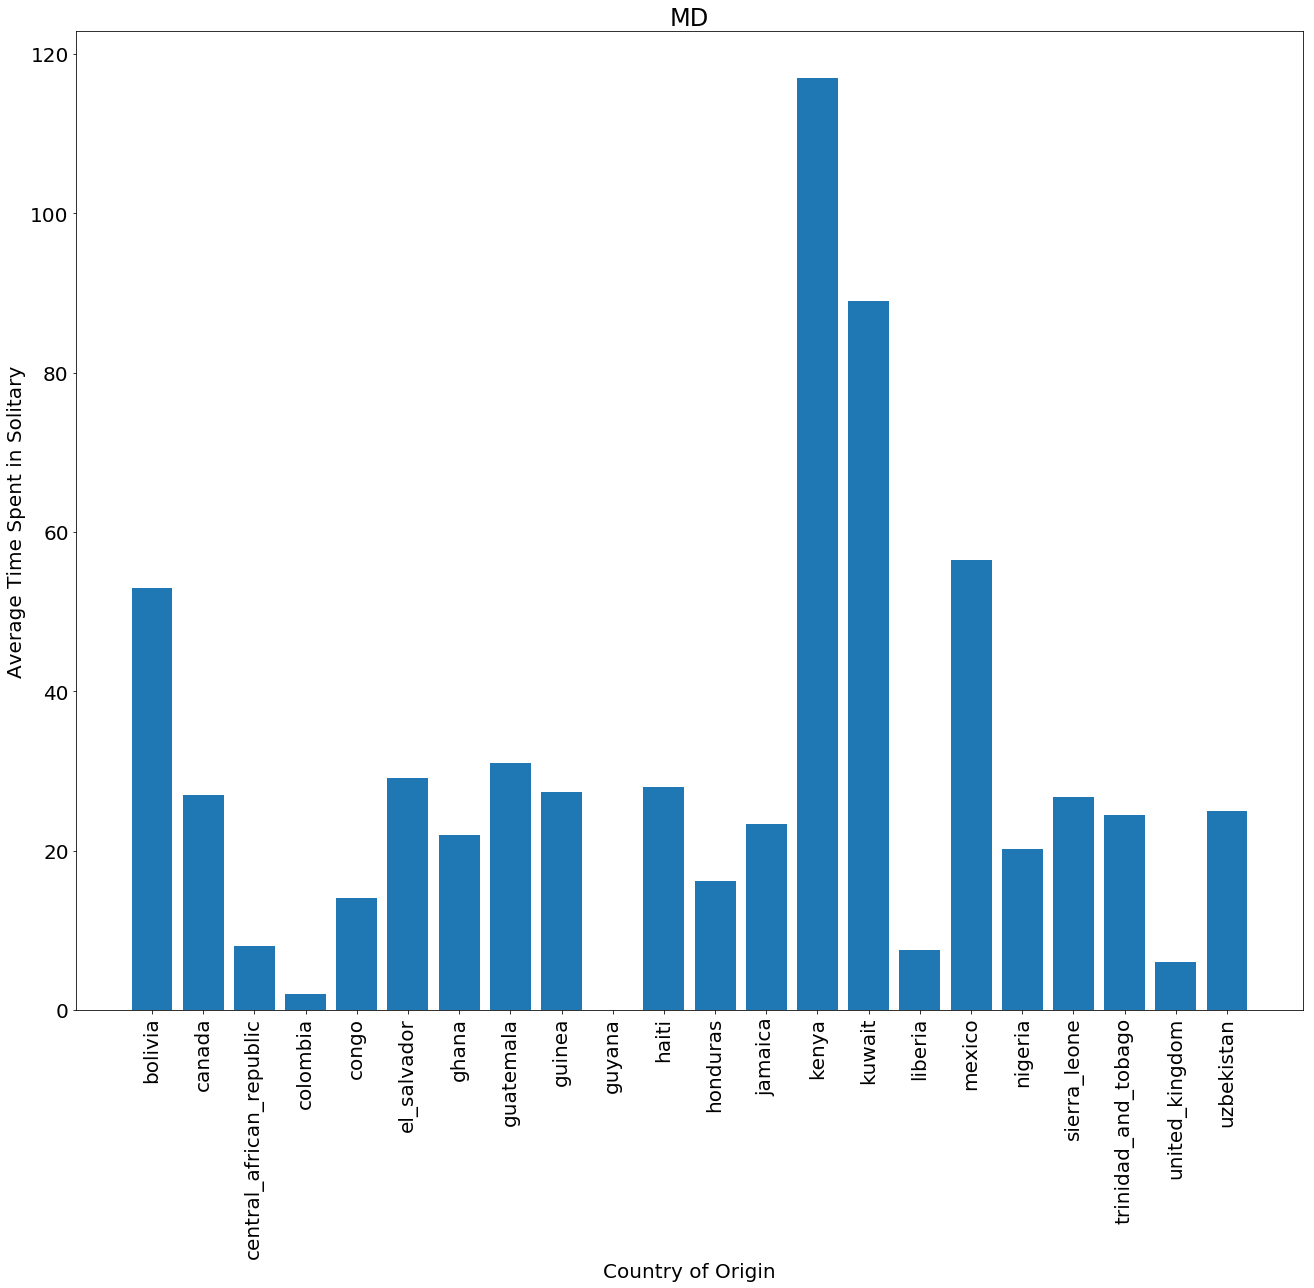

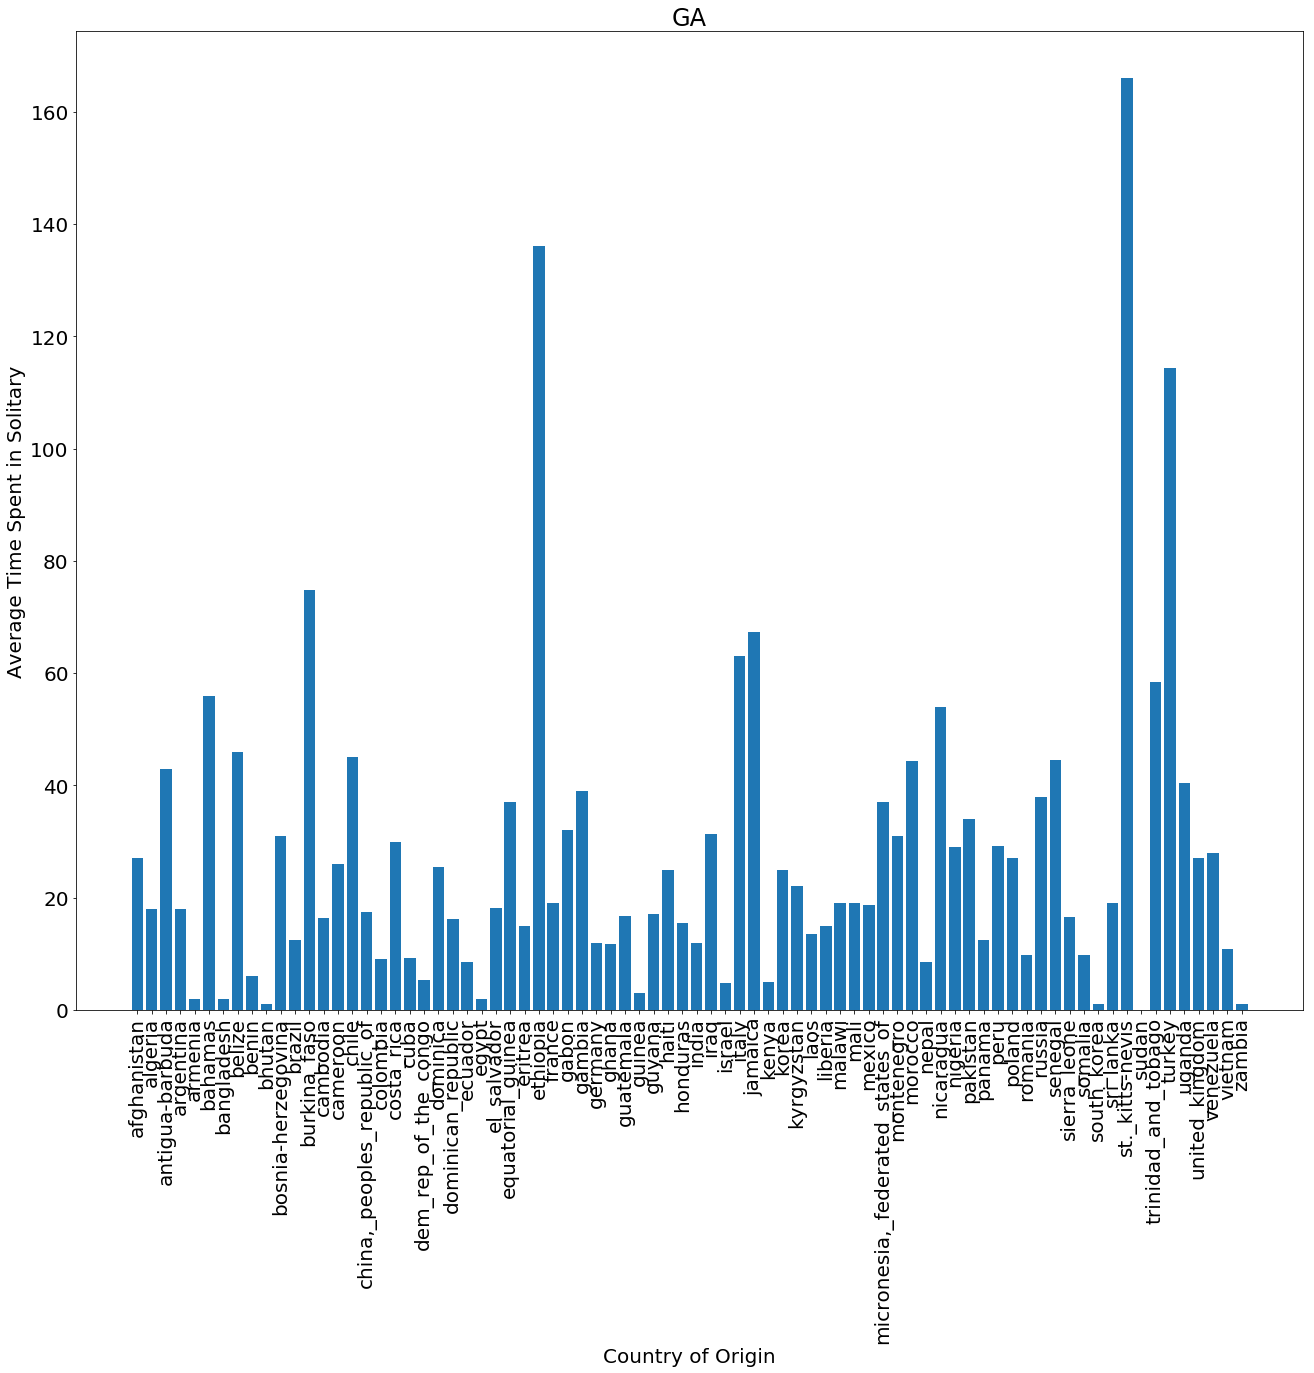

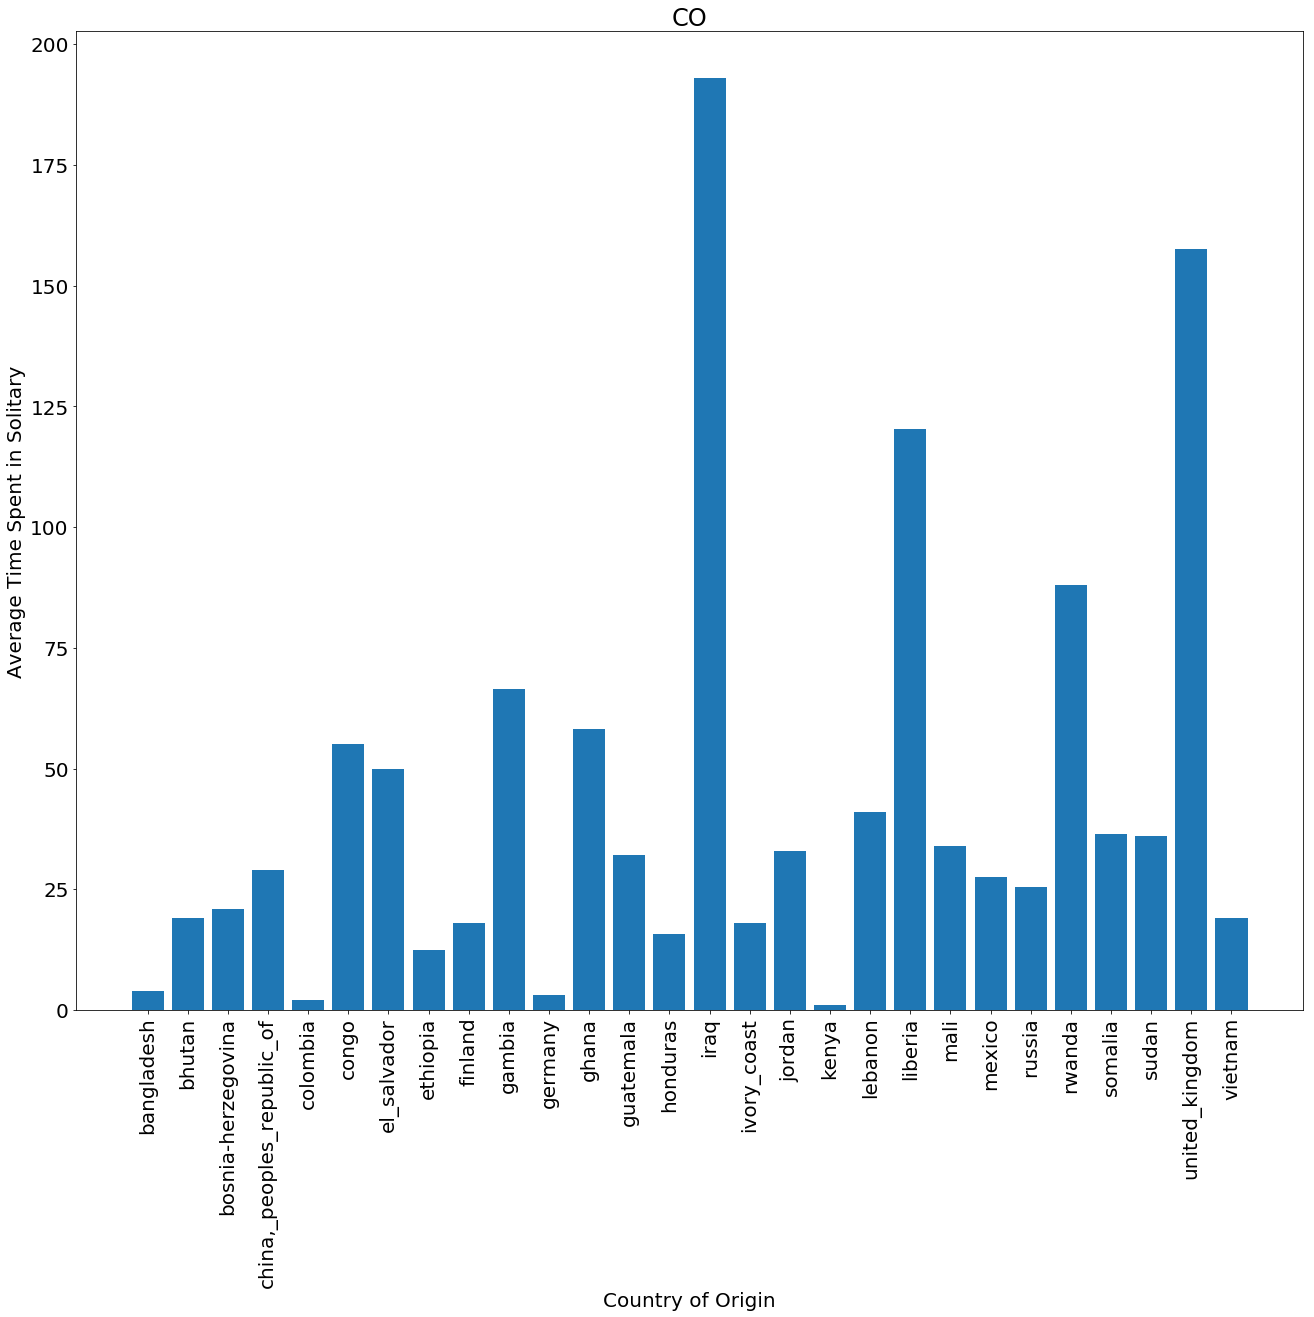

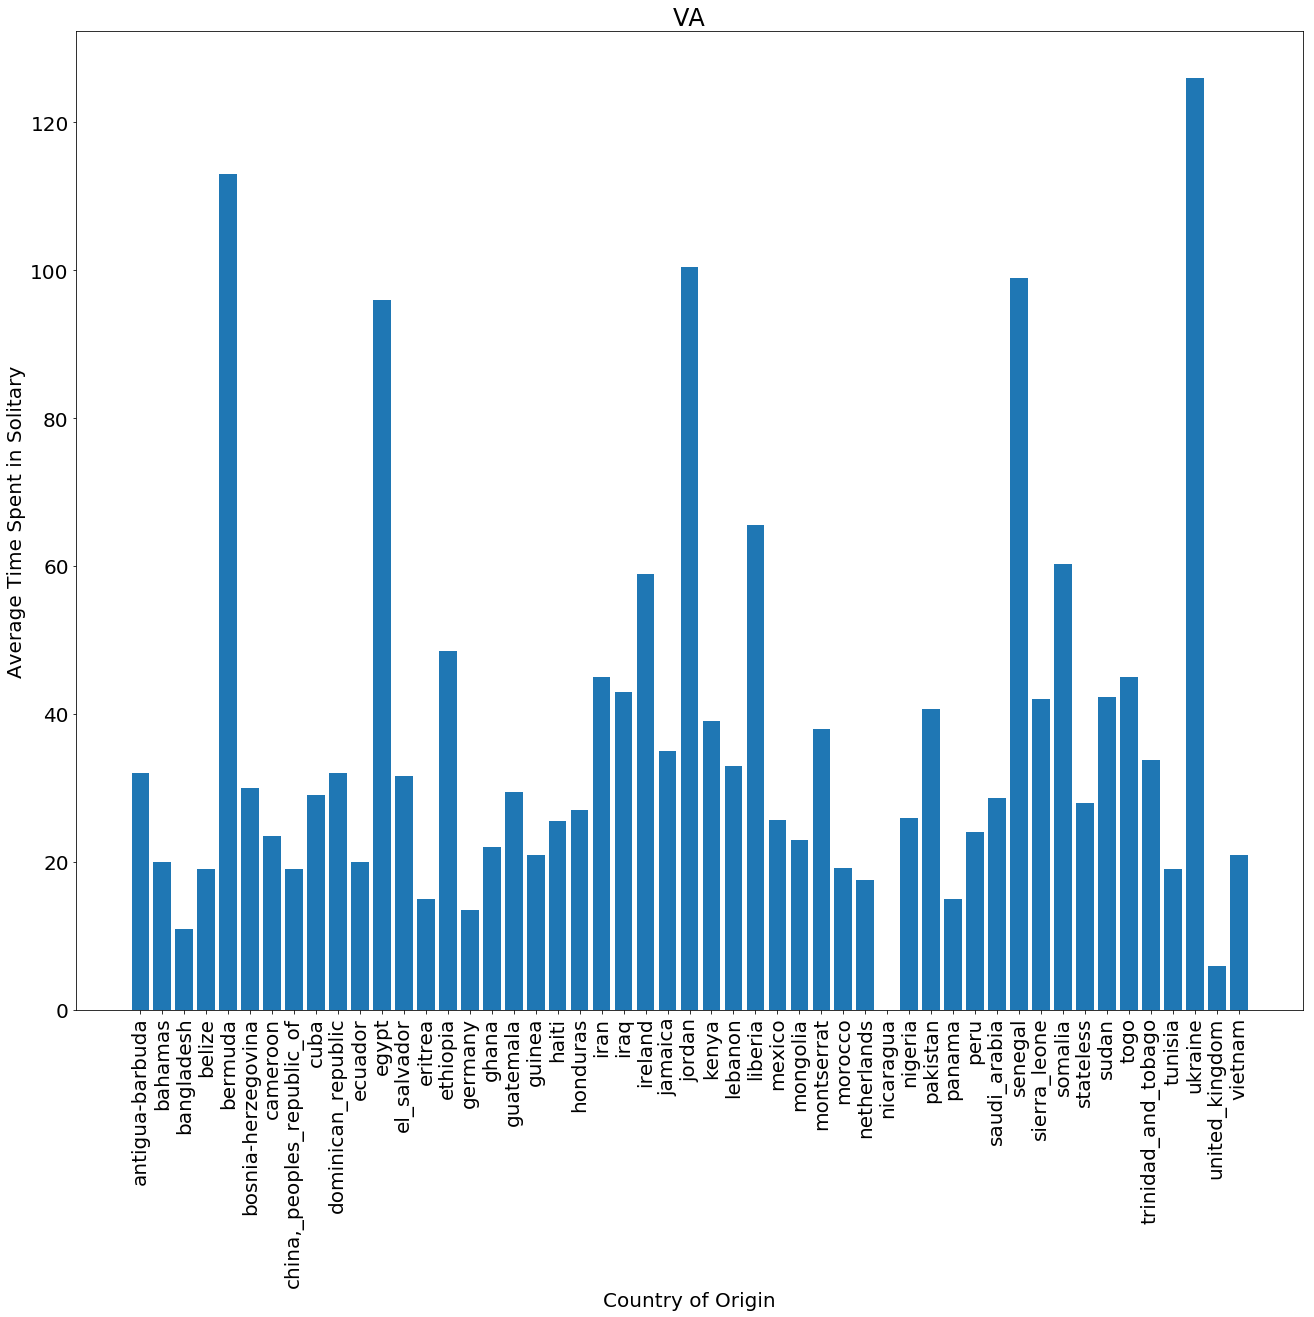

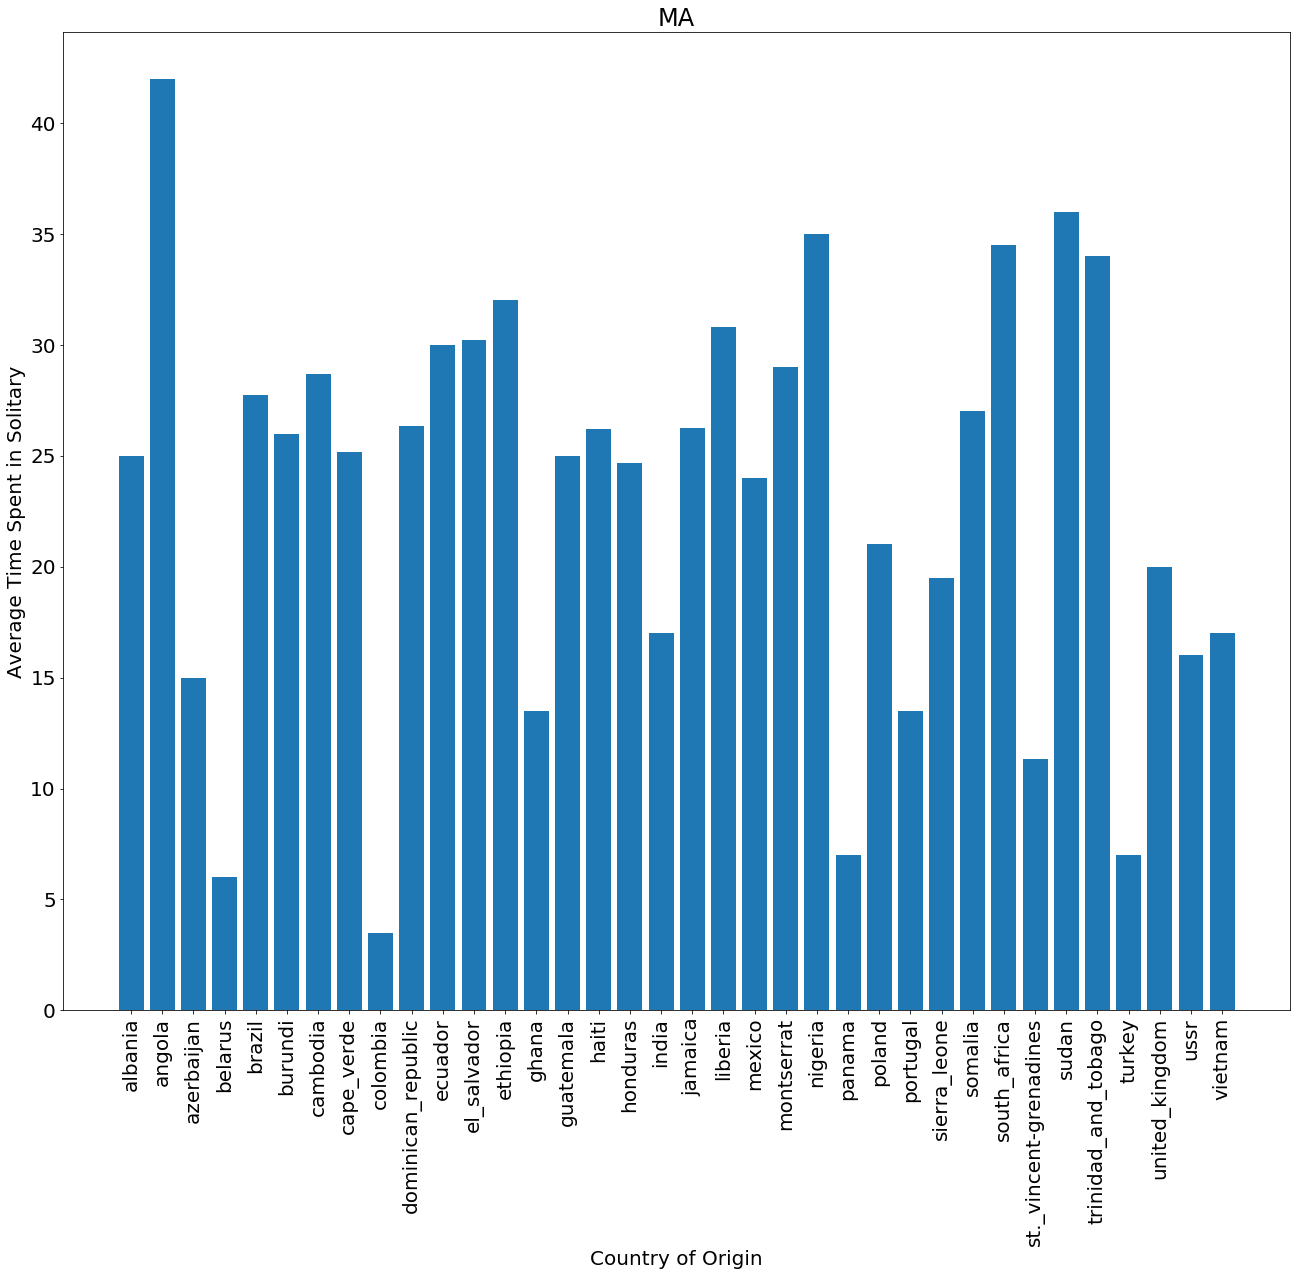

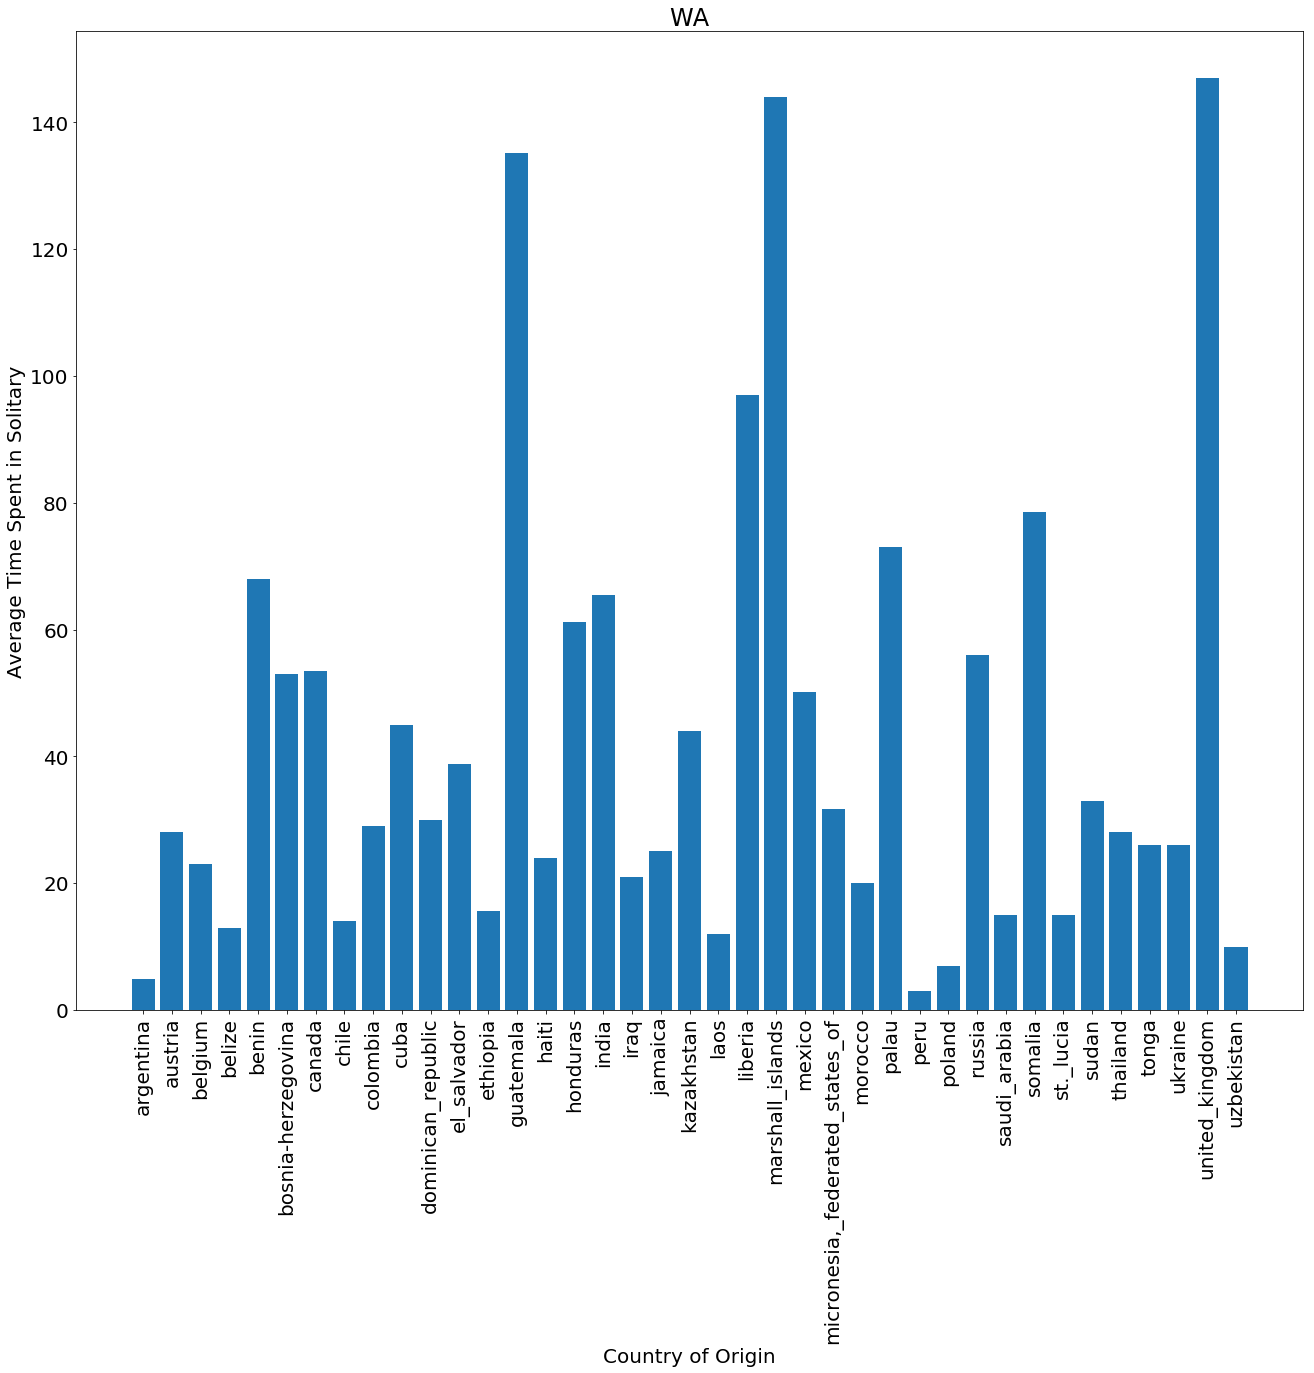

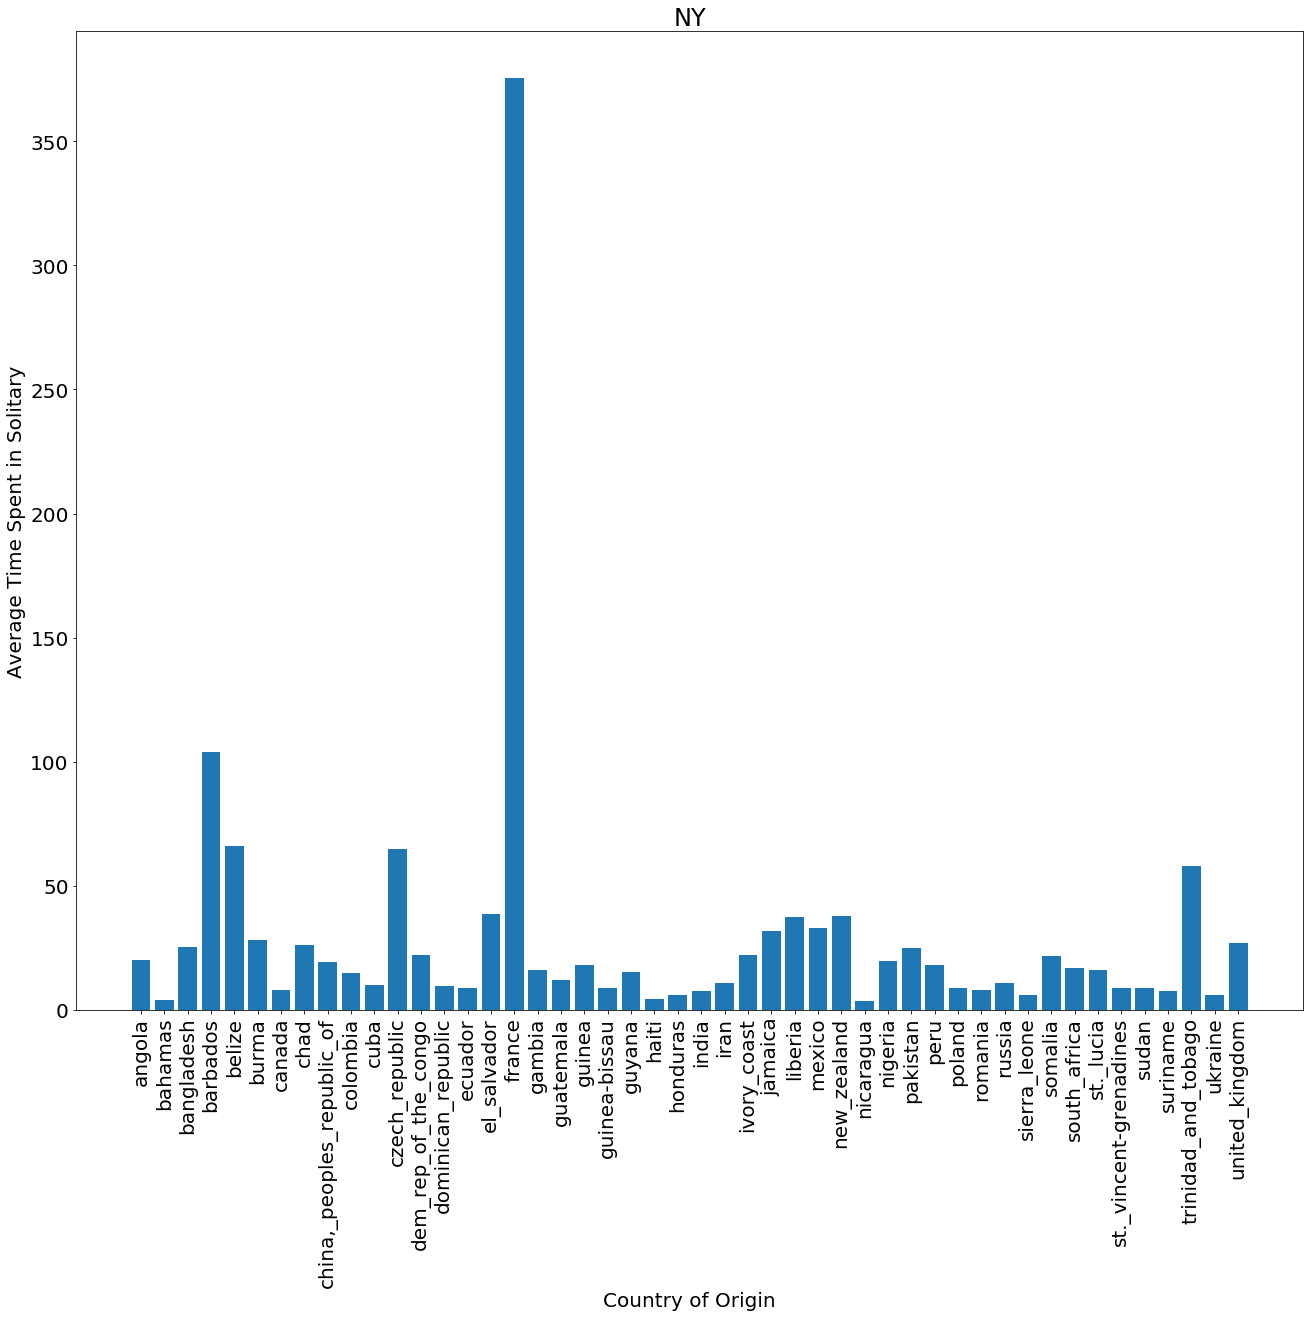

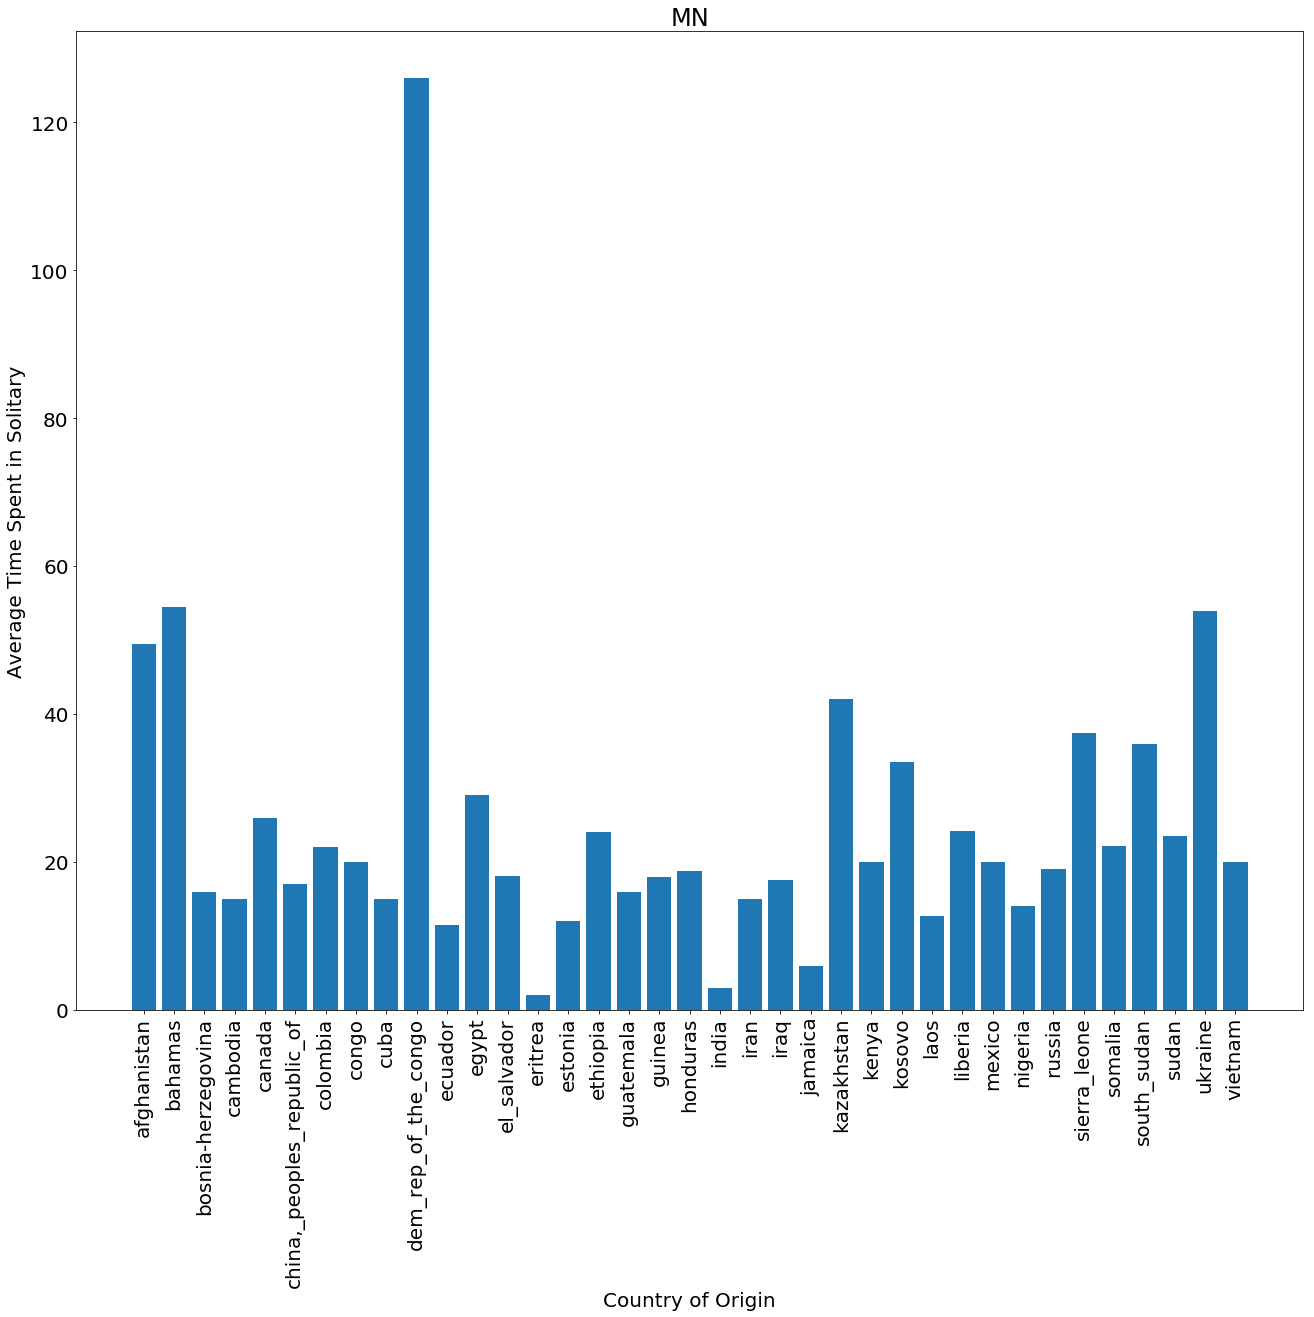

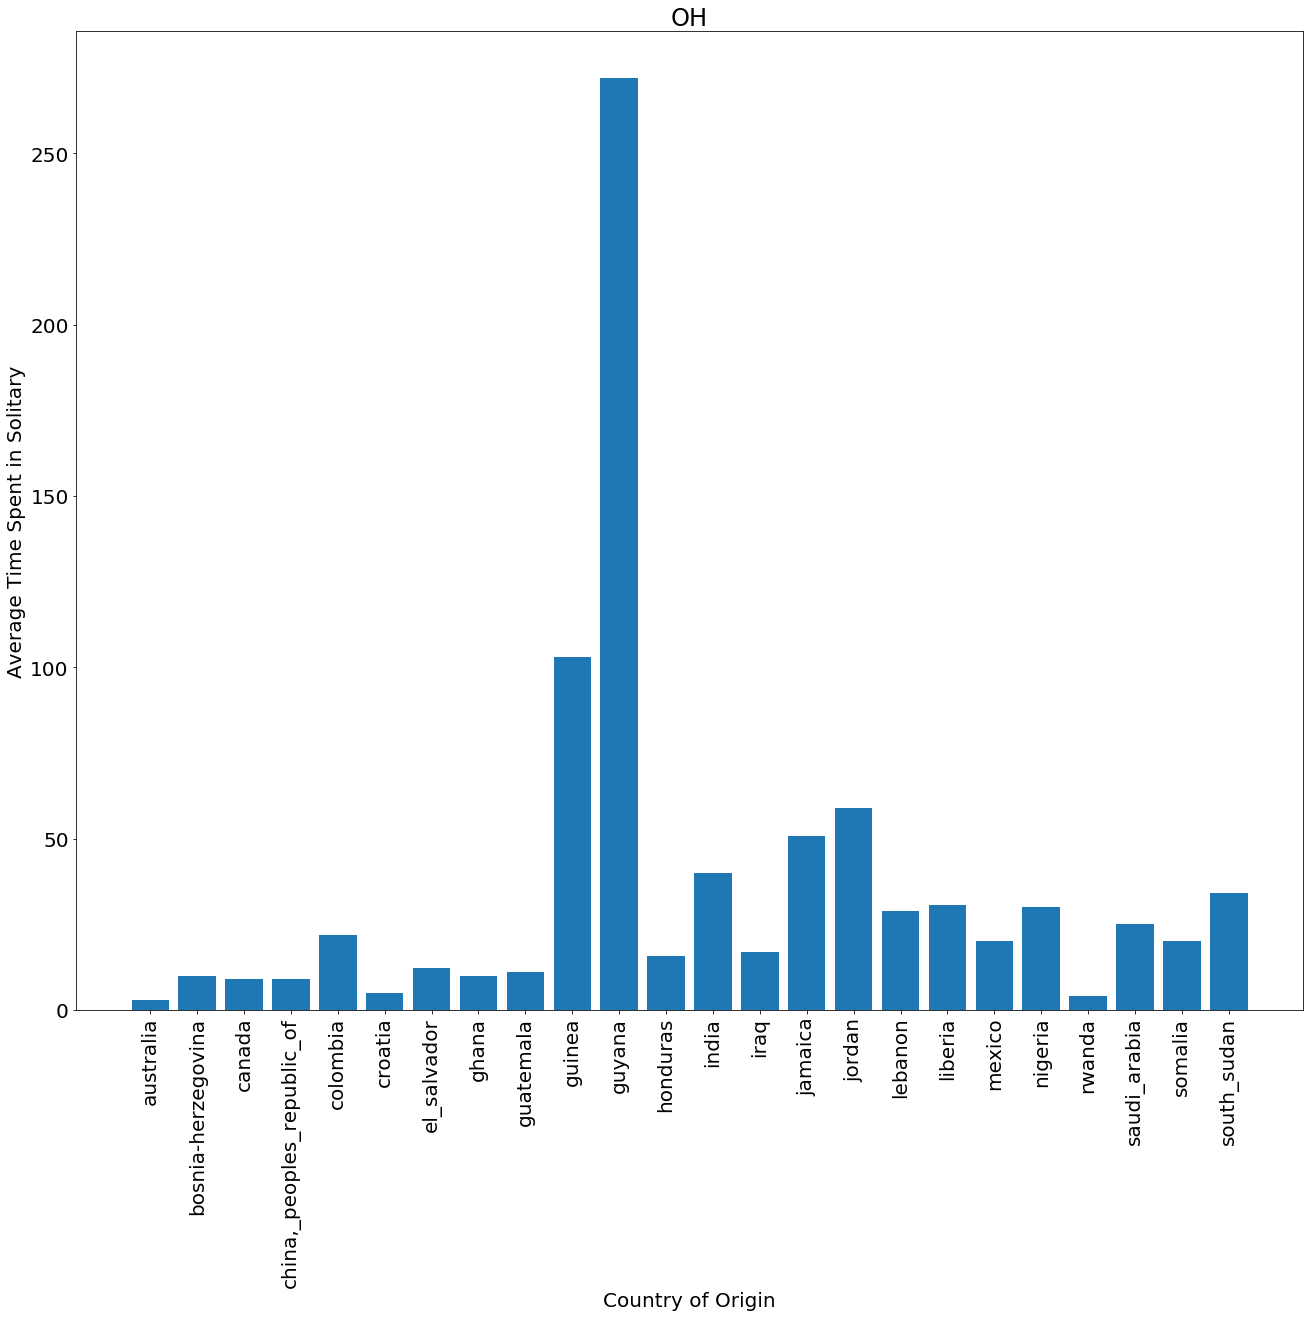

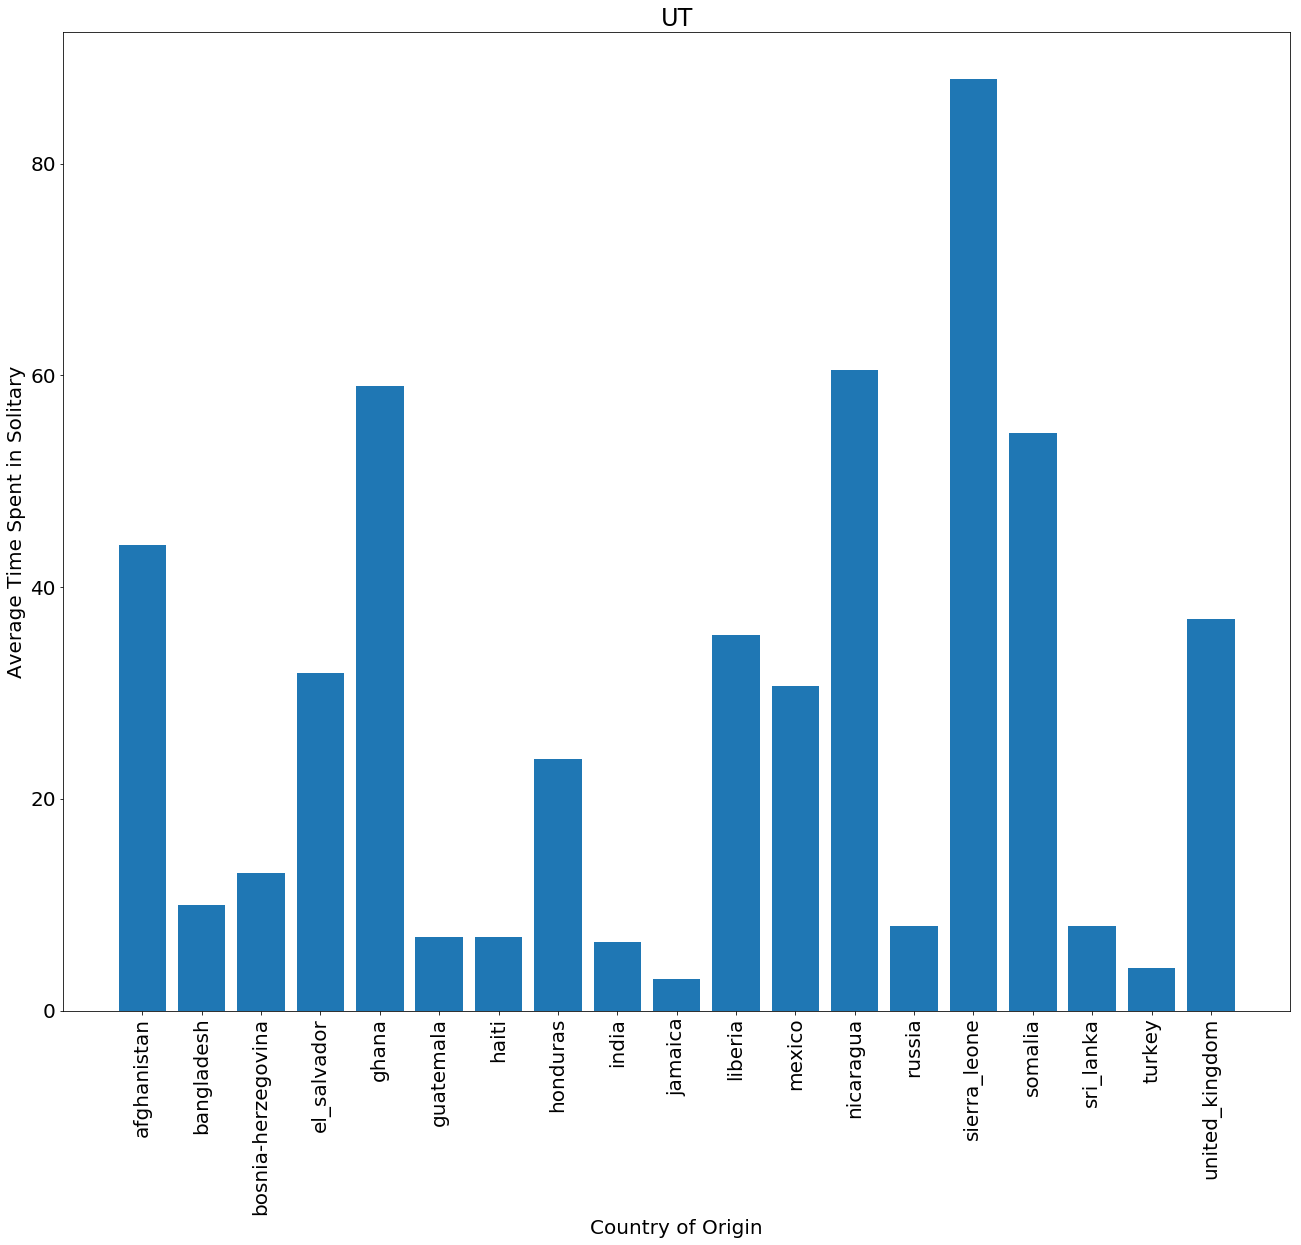

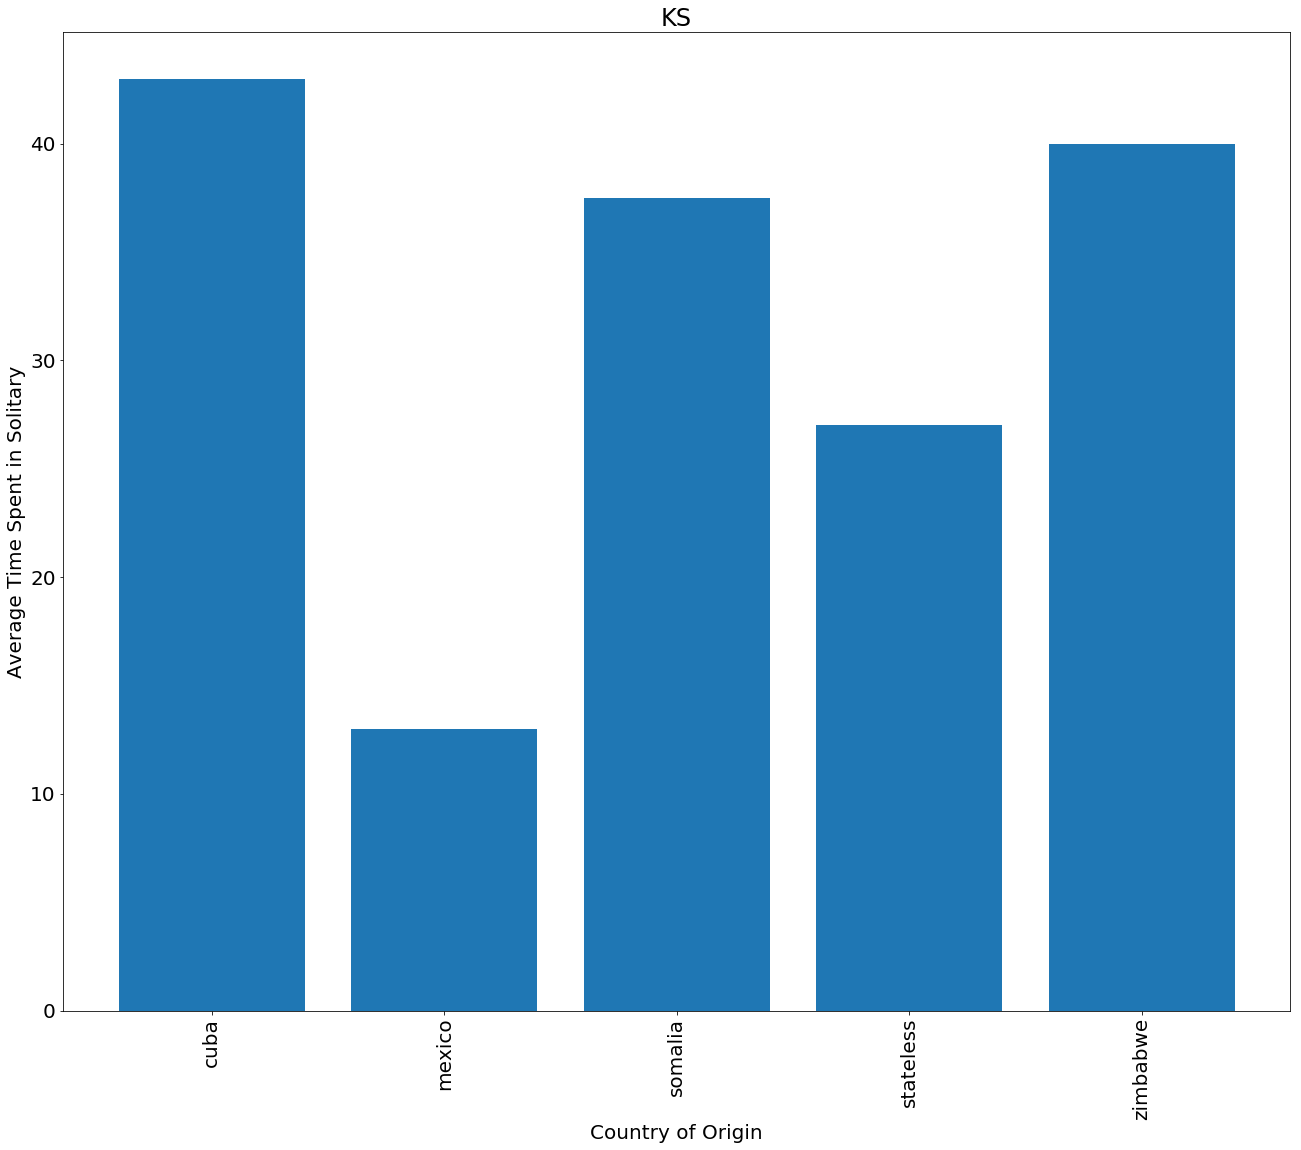

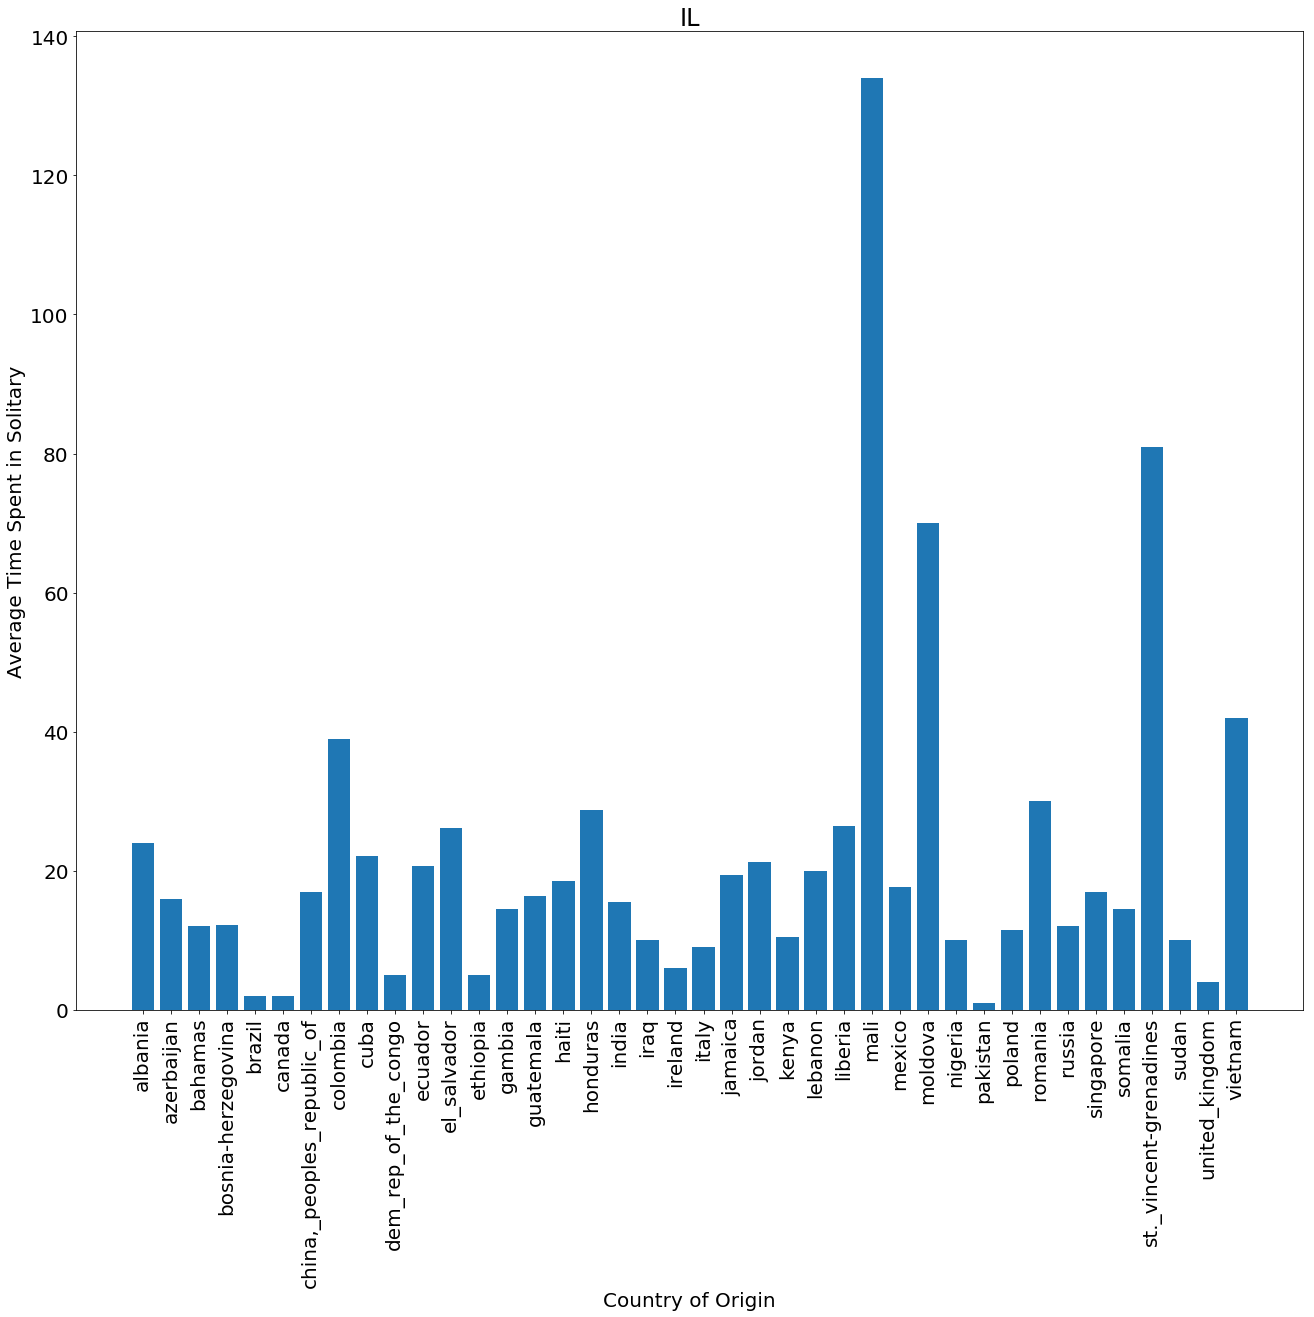

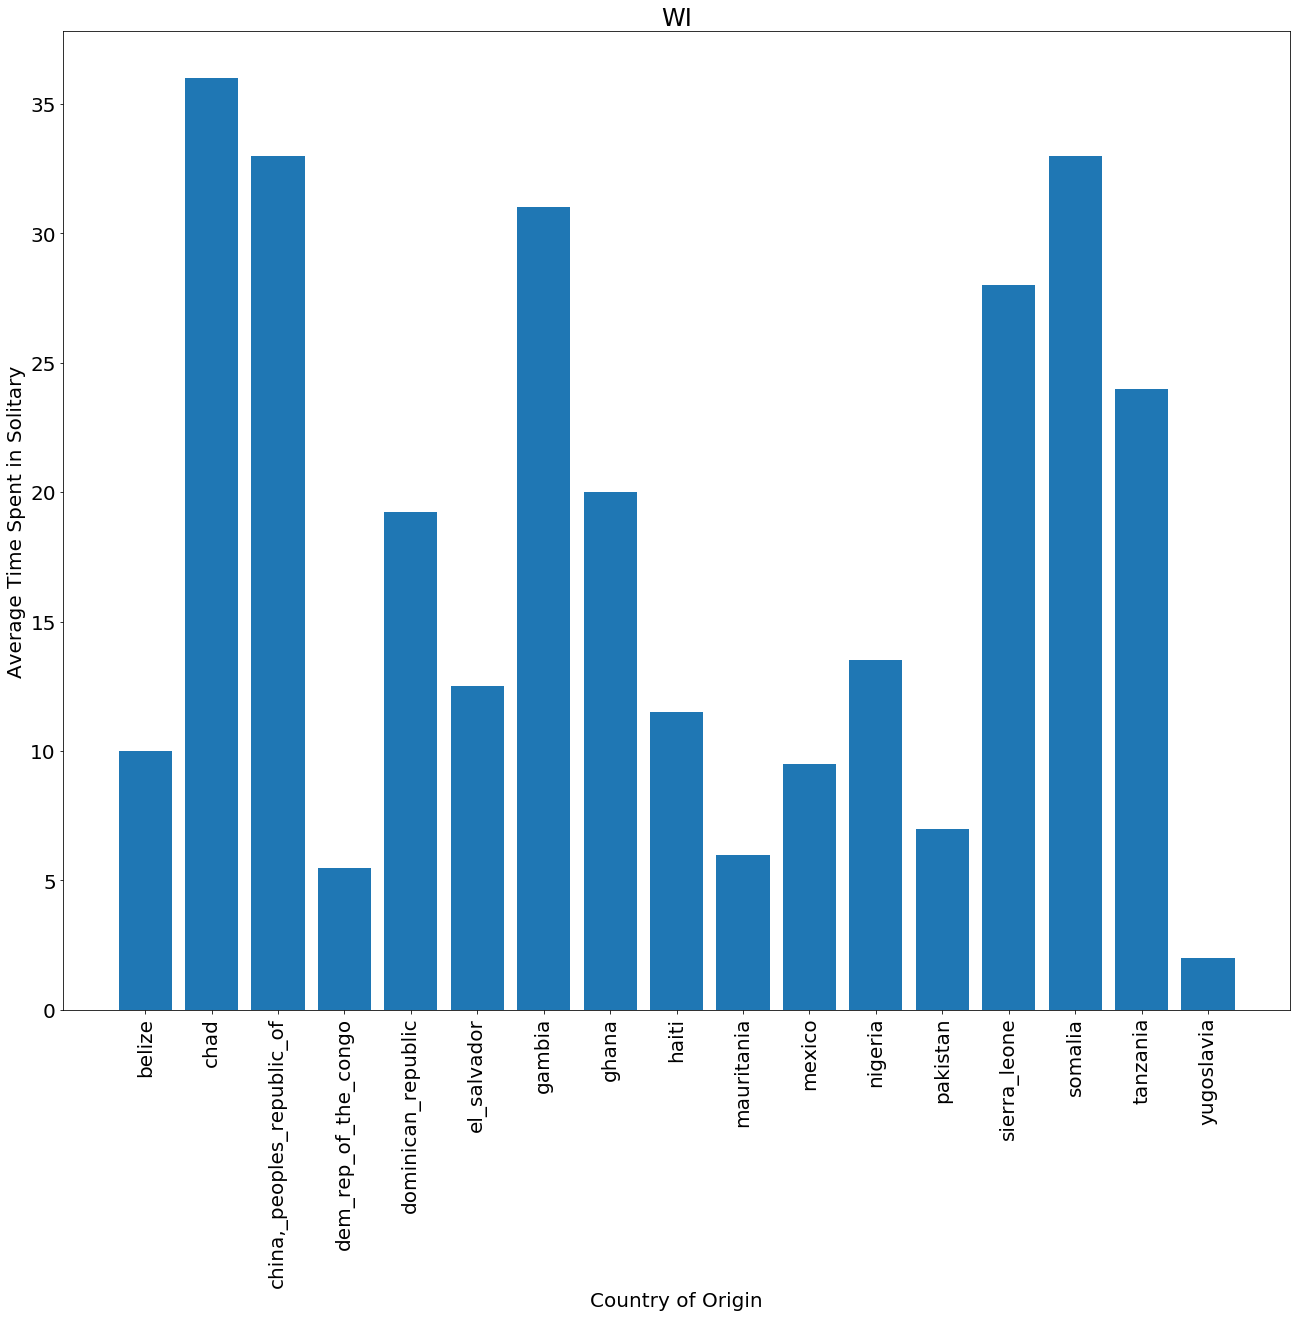

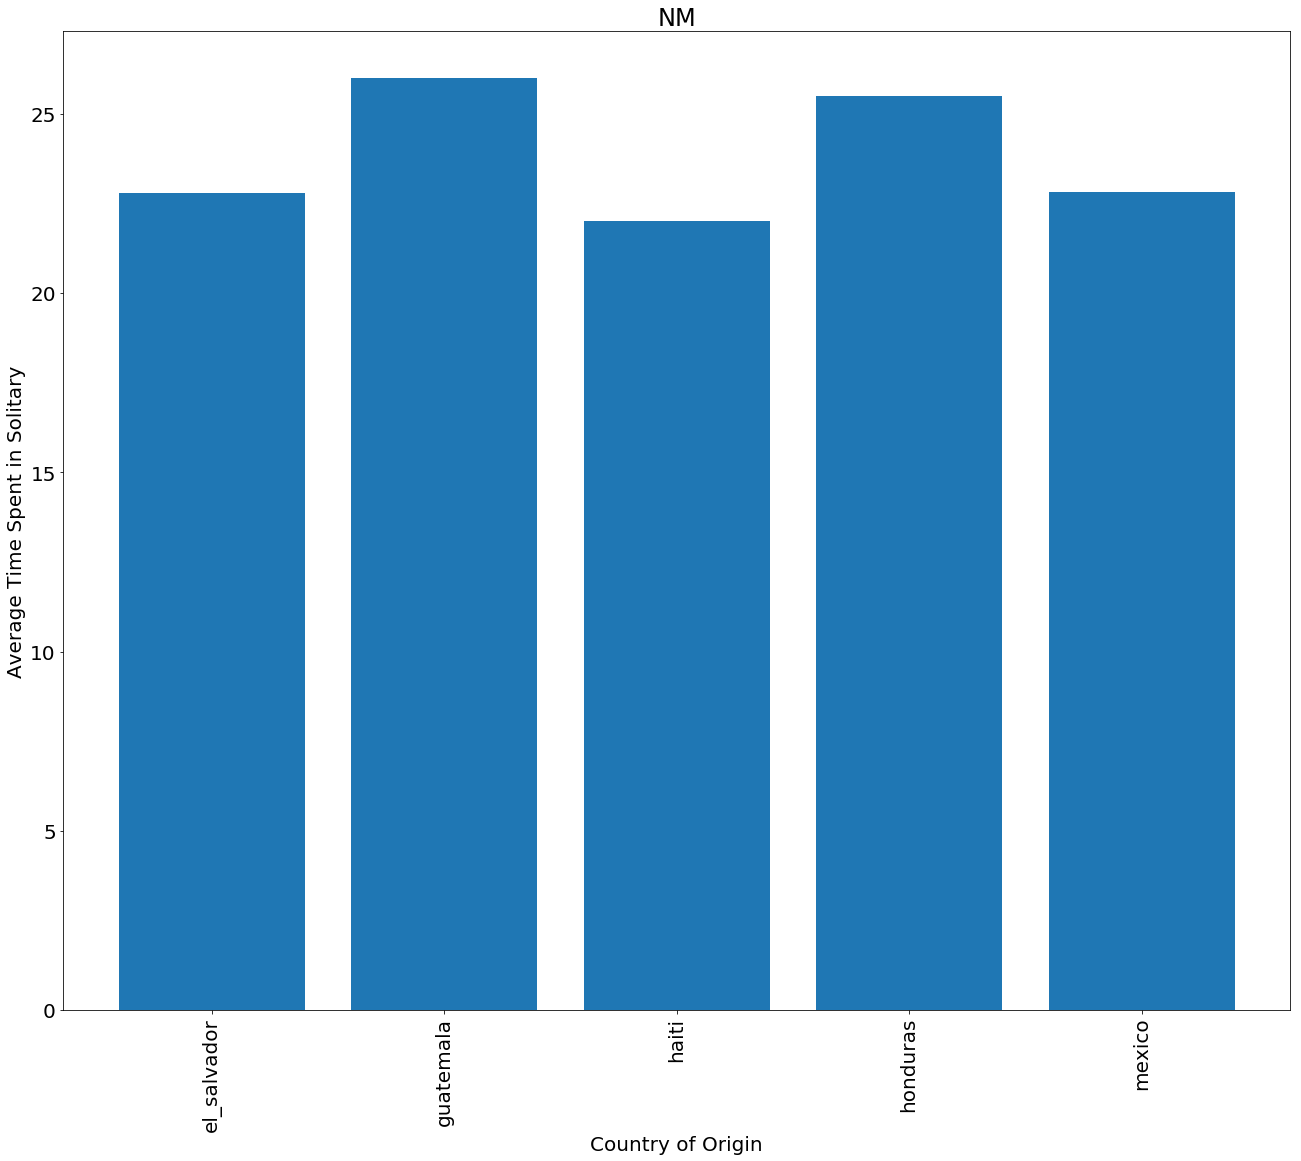

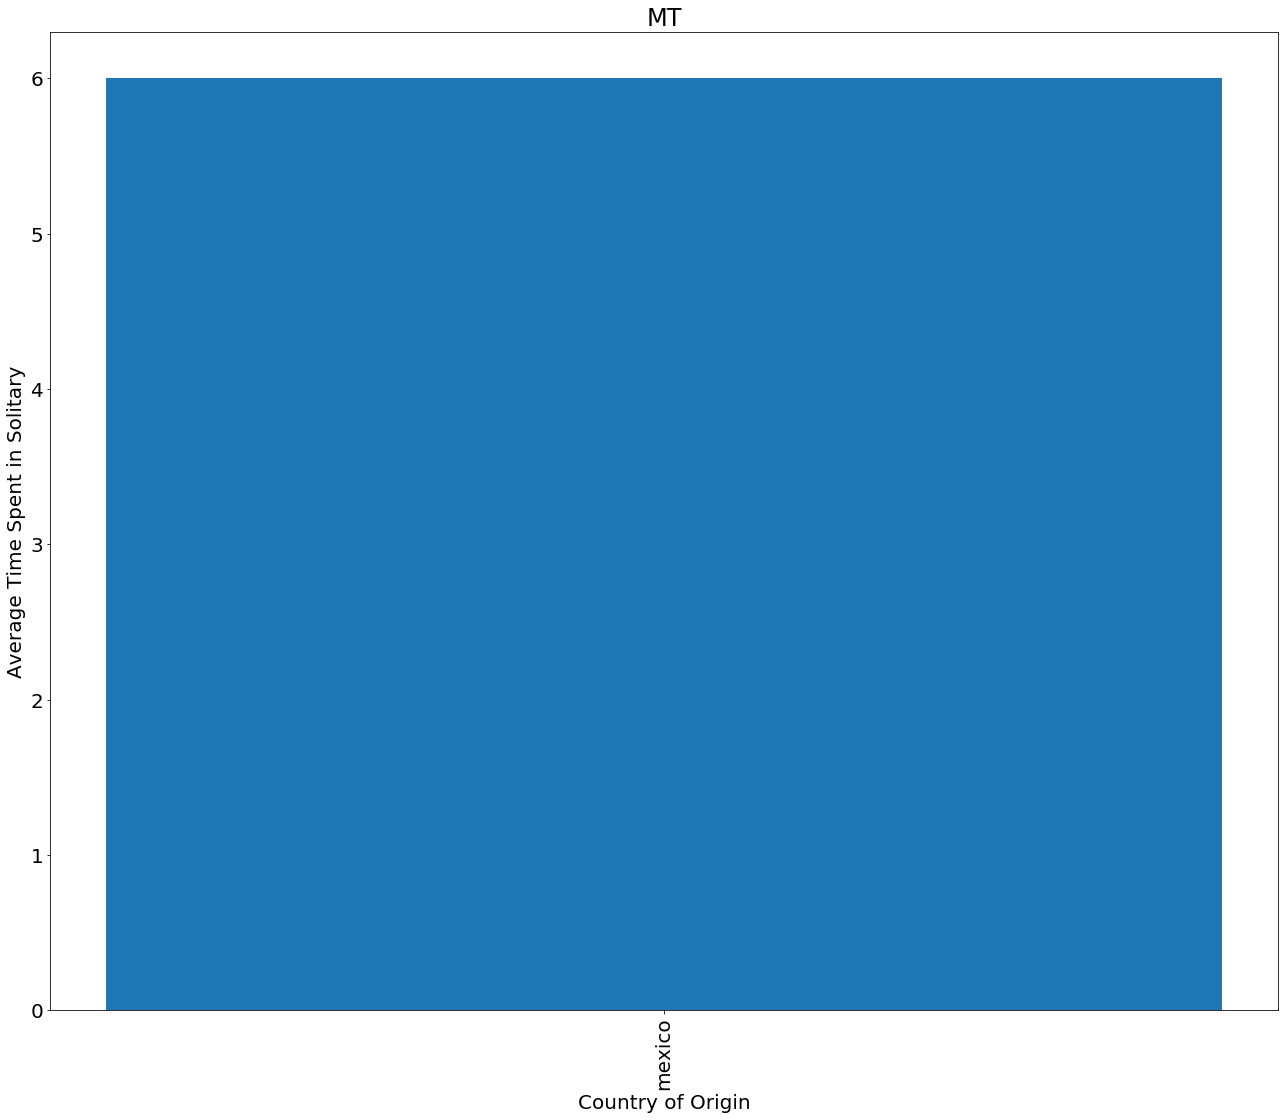

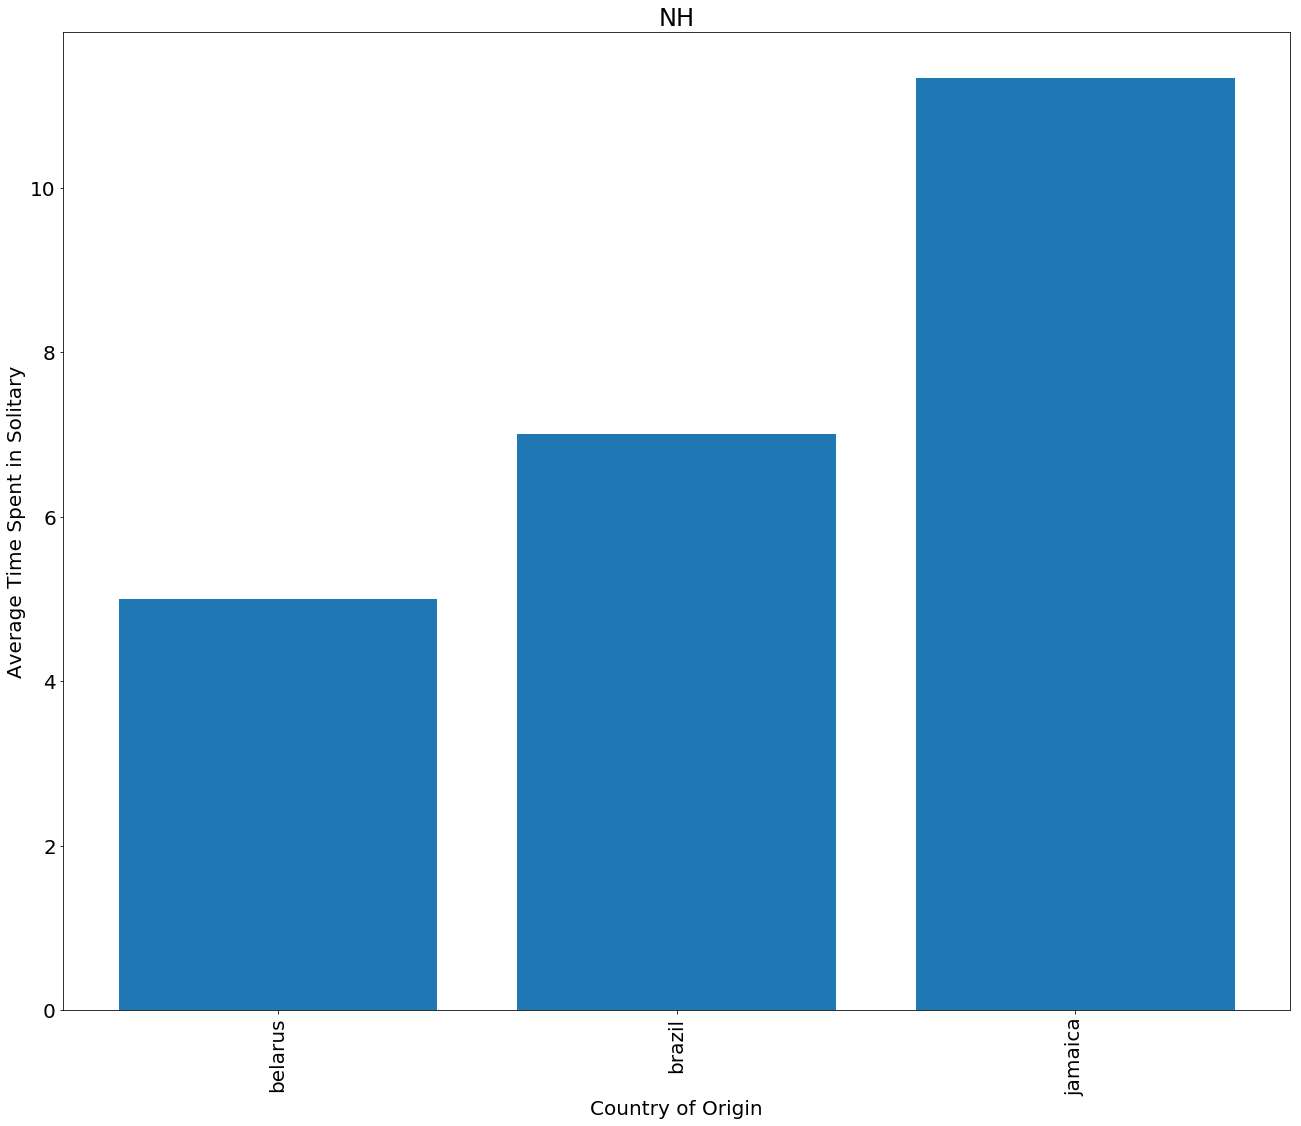

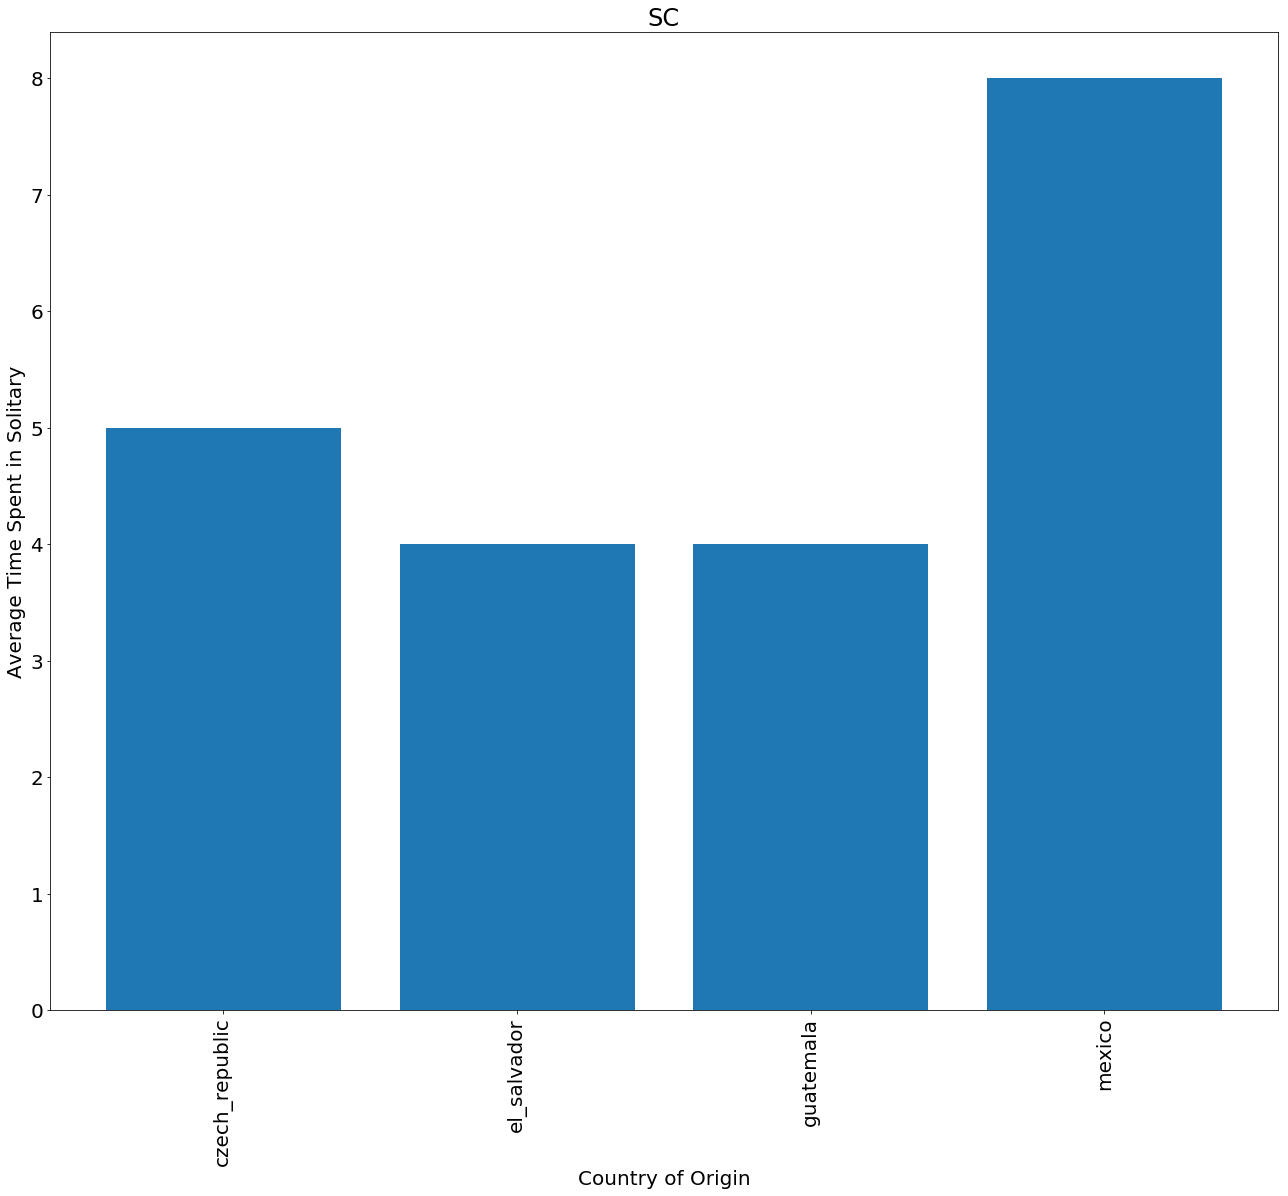

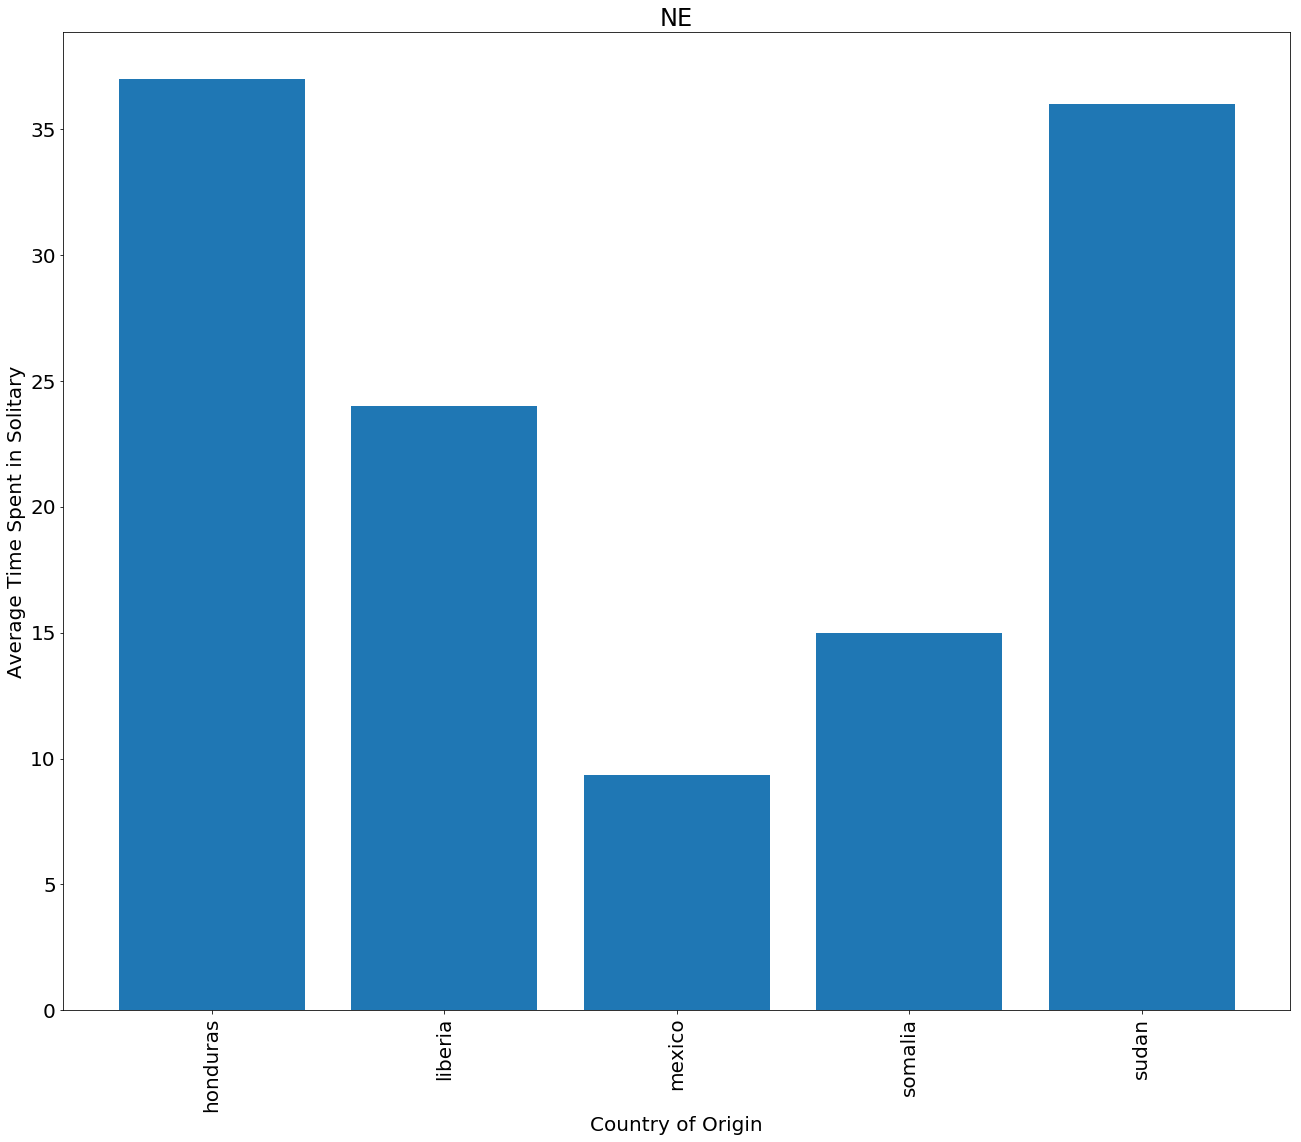

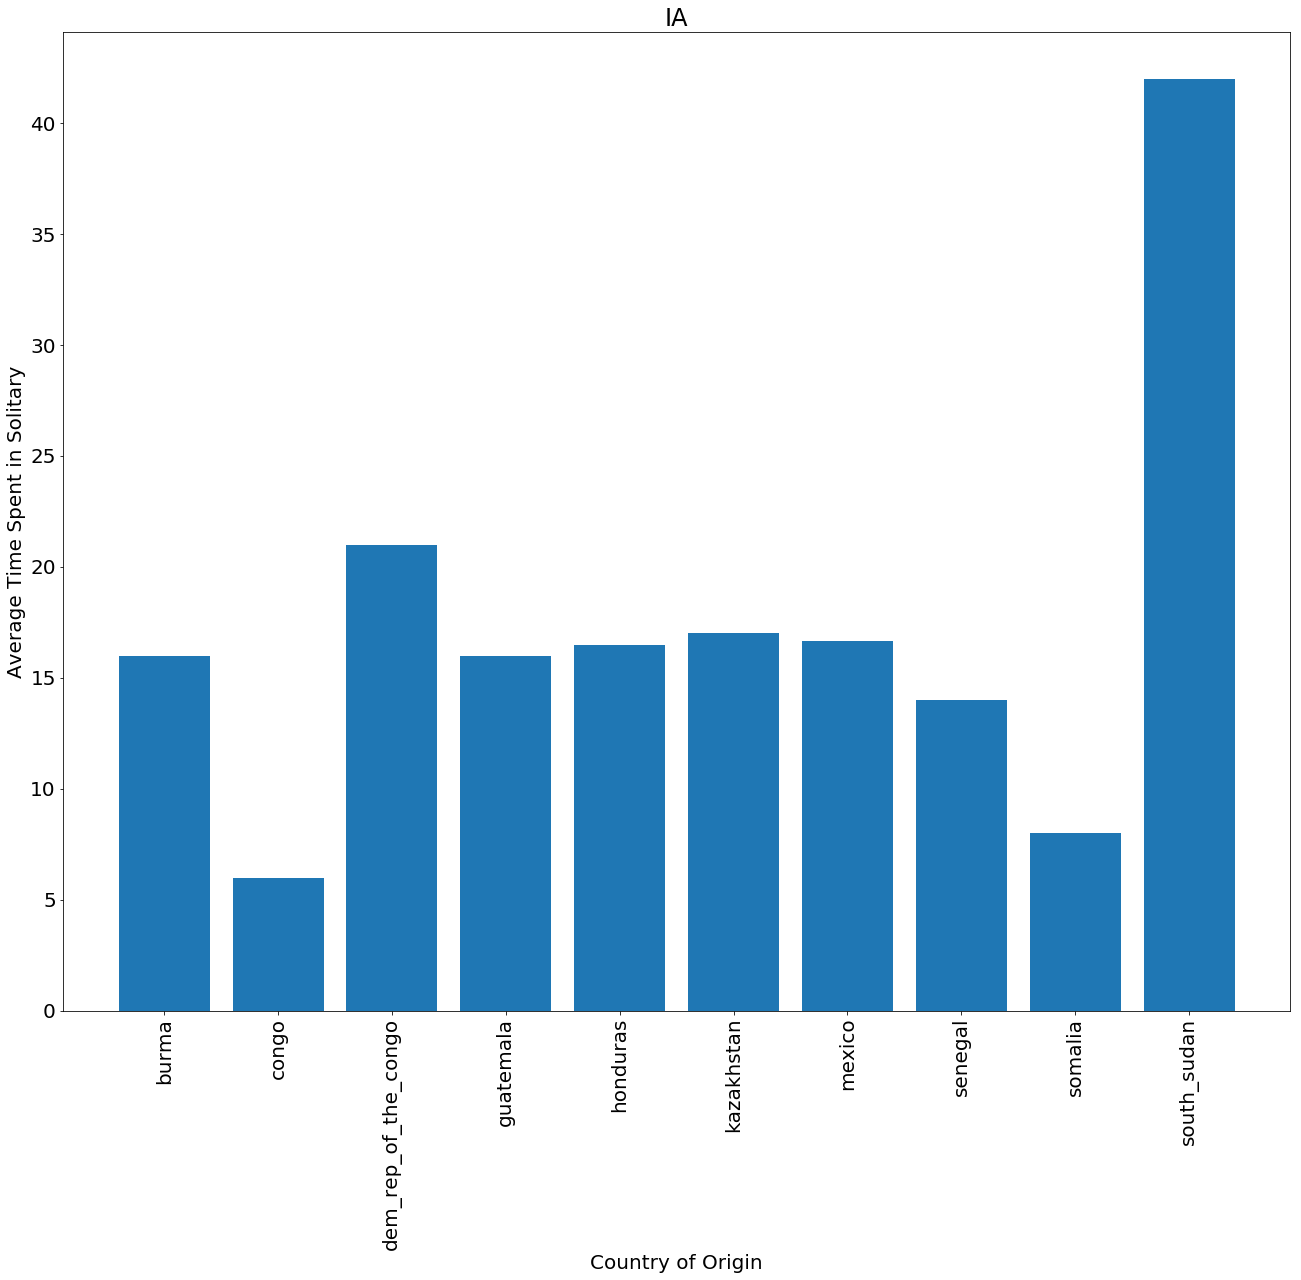

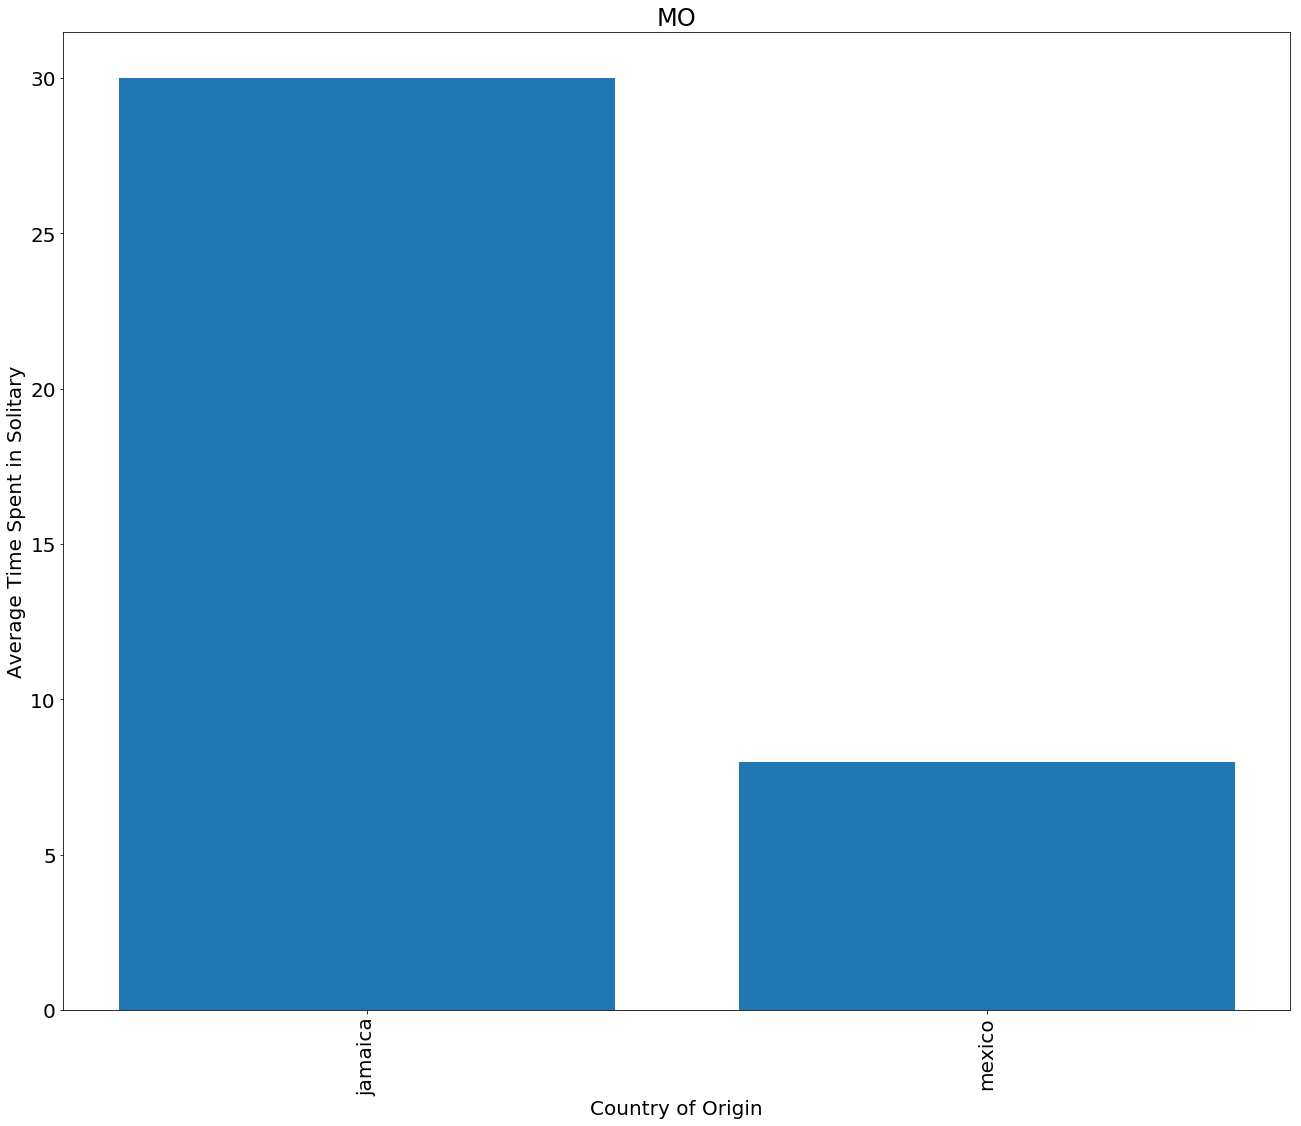

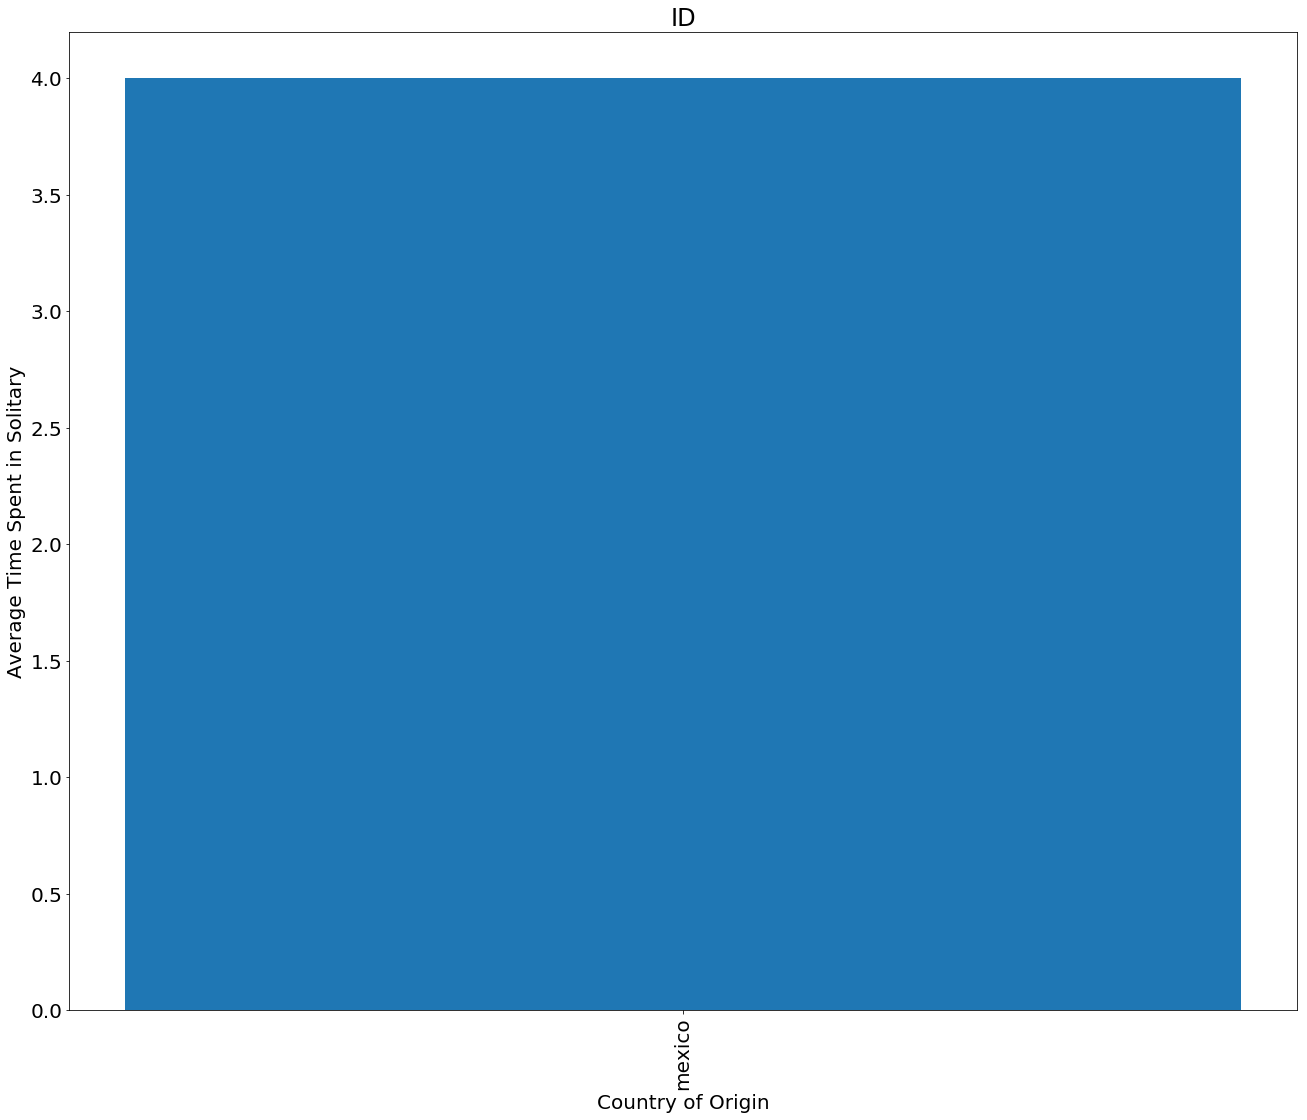

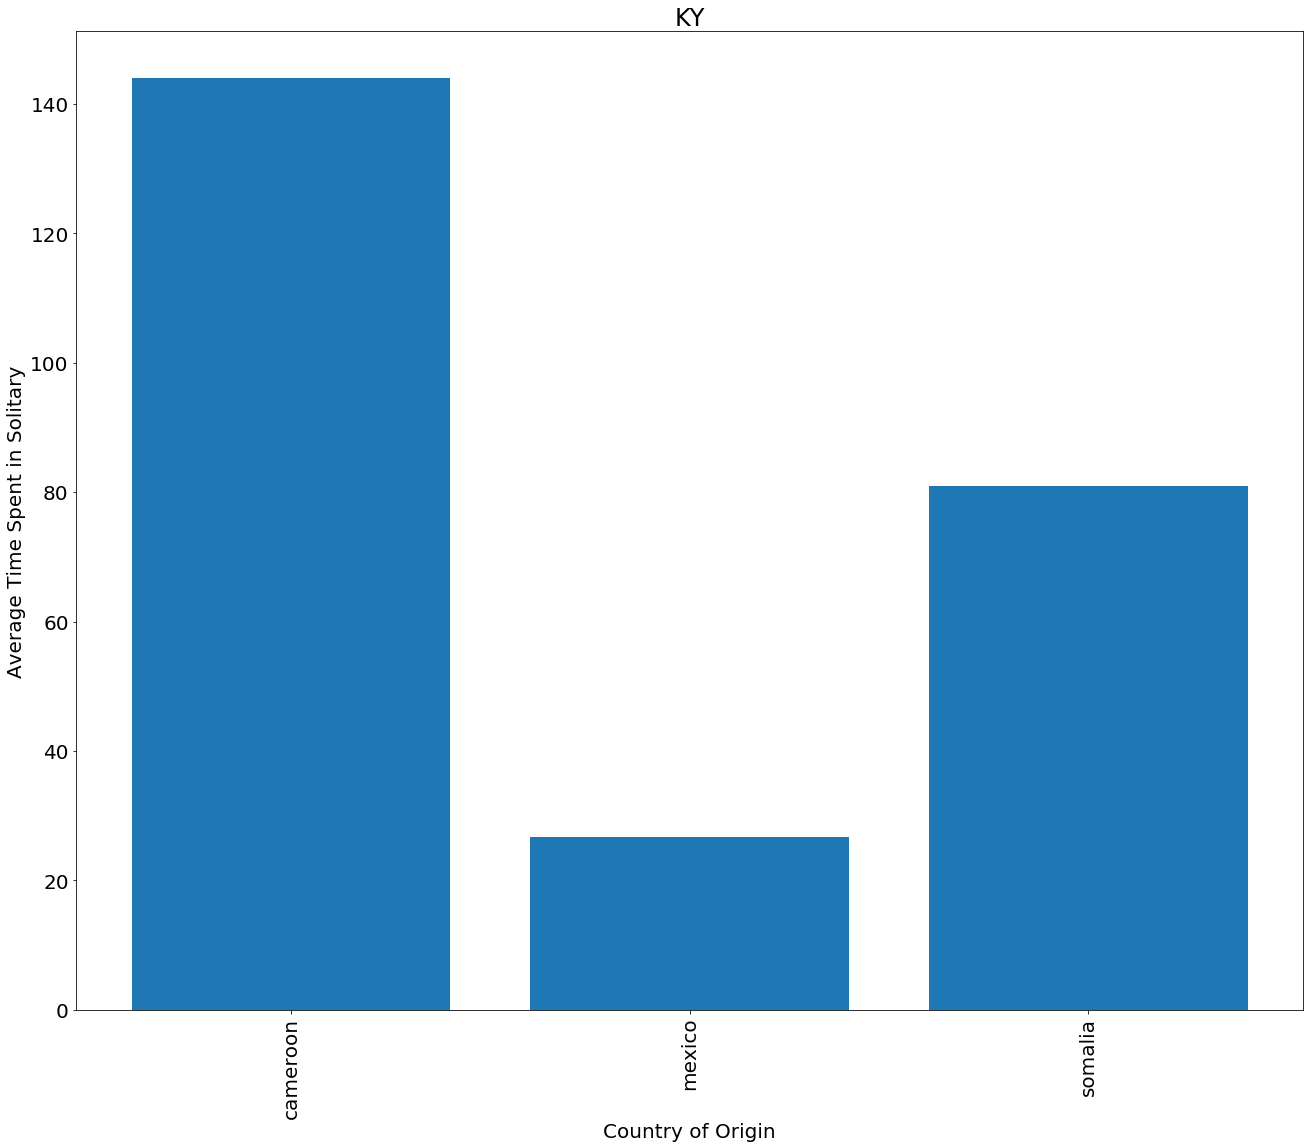

In [207]:
for i in range(len(solitary['state'].unique())):
    plt.figure(figsize=(22,18))
    plt.bar(np.arange(len(days_by_state_country[i][:,1])), np.array(days_by_state_country[i][:,2][:], dtype=float))
    plt.xticks(np.arange(len(days_by_state_country[i][:,1])), days_by_state_country[i][:,1], rotation='vertical')
    plt.ylabel('Average Time Spent in Solitary')
    plt.xlabel('Country of Origin')
    plt.title(solitary['state'].unique()[i])
    plt.savefig('I:\\Data_Incubator\\'+solitary['state'].unique()[i]+'.png',bbox_inches='tight')